# Lending Club Case Study
### by Ayush and Nivedita

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
loan_df.shape

(39717, 111)

- Observation: There are 39k+ rows and 100+ columns

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

Observation 
- There seem to be columns which have most values missing
- These can be dropped

---

## Feature Extraction
- We will choose the required columns for anlysis and drop the rest
- We will also drop columns with more than 90% missing values

### Null Value Analysis
- Choosing between imputing or dropping values based on threshold

In [7]:
# ?loan_df.dropna

#### Columns - Null Value Analysis

##### Dropping columns where all values are missing

In [8]:
loan_df.dropna(how='all', axis=1, inplace=True)

In [9]:
loan_df.shape

(39717, 57)

In [10]:
df_checkpoint = loan_df.copy()

In [11]:
loan_df.shape

(39717, 57)

##### Dropping columns which only have one type of value
- they won't provide any relevants insights (they have only value throughout the column)

In [12]:
for col in loan_df.columns:
    if len(loan_df[col].unique()) == 1:
        print("dropping:", col, "which contained:", loan_df[col].unique(), 'as the only value')
        loan_df.drop(col, inplace=True, axis=1)

dropping: pymnt_plan which contained: ['n'] as the only value
dropping: initial_list_status which contained: ['f'] as the only value
dropping: policy_code which contained: [1] as the only value
dropping: application_type which contained: ['INDIVIDUAL'] as the only value
dropping: acc_now_delinq which contained: [0] as the only value
dropping: delinq_amnt which contained: [0] as the only value


In [13]:
loan_df.shape

(39717, 51)

In [14]:
col_checkpoint = loan_df.copy()

In [15]:
loan_df.shape

(39717, 51)

##### Checking percentage of missing values in all columns

In [16]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)

In [17]:
# list of columns which have missing values
miss_percentage.loc[miss_percentage > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### Observation: We can see that there are 2 columns with more than 90% missing values and one column with more than 60% missing values.

- First, we remove the columns with more than 90% missing values

In [18]:
loan_df.drop(list(miss_percentage[miss_percentage >= 90].index), axis=1, inplace=True)

- Next, we check what kind of values does mths_since_last_delinq has.

In [19]:
loan_df.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [20]:
loan_df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
115.0      1
106.0      1
95.0       1
120.0      1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

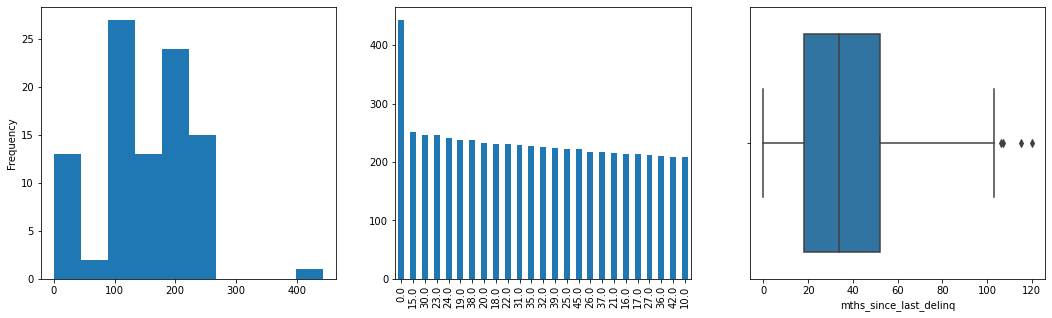

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

loan_df.mths_since_last_delinq.value_counts().plot(kind='hist', ax=ax1)
loan_df.mths_since_last_delinq.value_counts()[0:10].plot(kind='bar', ax=ax2)
sns.boxplot(x='mths_since_last_delinq', data=loan_df, ax=ax3)

plt.show()

#### Note:

This column lets us know the number of months since the borrower's last delinquency.  
- Only 400 people out 13k are not defaulting on monthly payments, so it does not seem to be a strong indicator for whether a person will be "Charged off" or not
- There are more than 60% missing values in this column
- It also seems like this data will not be available during loan application period, hence we are dropping this column

In [22]:
loan_df.drop(['mths_since_last_delinq'], axis=1, inplace=True)

In [23]:
loan_df.shape

(39717, 48)

In [24]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_late_fee recoveries  \
0   10.65%       162.87     B        B2  ...               0.00       0.00   
1   15.27%        59.83     C        C4  ...               0.00     117.08   
2   15.96%        84.33     C        C5  ...               0.00       0.00   
3   13.49%       339.31     C        C1  ...              16.97       0.00   
4   12.69%        67.79     B        B5  ...               0.00       0.00   

  collection_recovery_fee  last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                    0.00        Jan-15          171.62             May-16   
1                    1.11        Apr-13          119.66             Sep-13   
2                    0.00        Jun-14          649.91             May-16   
3                    0.00        Jan-15          357.48             Apr-16   
4                    0.00        May-16           67.79             May-16   

  collections_12_mths_ex_med chargeoff_within_12_mths pub_rec_bankruptcies  \
0                        0.0                      0.0                  0.0   
1                        0.0                      0.0                  0.0   
2                        0.0                      0.0                  0.0   
3                        0.0                      0.0                  0.0   
4                        0.0                      0.0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 48 columns]

###### Observation: about 55% of the columns had no relevant information, and have beend dropped

---

#### Rows - Null Value Analysis

In [25]:
loan_df.dropna(how='all', axis=0).shape

(39717, 48)

##### Observation: There are no rows where all values are missing

In [26]:
loan_df.dropna().shape

(24406, 48)

In [27]:
len(loan_df[loan_df.isnull().sum(axis=1) <= 3])

39673

##### Observation: There are no rows with more than 3 missing values, hence no rows need to be dropped

---

### Feature Extraction
- We will analyze the columns and description and decide whether they are relevant for our analysis or not

In [28]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Dropping customer behavior columns which are not present at the time of loan application

In [29]:
all_cust_behav_col = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']
loan_df.drop(all_cust_behav_col, axis=1, inplace=True)

##### After analyzing the column description we have decided to drop some columns

| Column          | Reason                                |
|-----------------|---------------------------------------|
| member_id       | similar to id                         |
| funded_amnt     | Data Unavailable when loan is applied |
| funded_amnt_inv | Data Unavailable when loan is applied |
| url             | not required for analysis             |
| desc            | not important for reducing risk       |
| title           | similar to purpose                    |
| zip_code        | country code gives sufficient info    |



In [30]:
loan_df.drop(['member_id', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title', 'zip_code'], axis=1, inplace=True)

In [31]:
loan_df.shape

(39717, 21)

In [32]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### For the analysis, there is no particular relevance of the `id` column, hence dropping it

In [33]:
loan_df.drop(['id'], axis=1, inplace=True)

##### Looking closely at the data, some of the columns are filled with one value or NaN, so we will drop these as well

In [34]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [35]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [36]:
loan_df.tax_liens.unique()

array([ 0., nan])

In [37]:
loan_df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [38]:
loan_df.shape

(39717, 17)

##### Observation: ~15% columns remain after feature selection

##### As a final step we check for correlation between the numeric columns

In [39]:
loan_df.corr()

loan_amnt  installment  annual_inc       dti  \
loan_amnt              1.000000     0.930288    0.271149  0.066439   
installment            0.930288     1.000000    0.270874  0.054186   
annual_inc             0.271149     0.270874    1.000000 -0.122732   
dti                    0.066439     0.054186   -0.122732  1.000000   
pub_rec_bankruptcies  -0.037180    -0.034103   -0.016801  0.005691   

                      pub_rec_bankruptcies  
loan_amnt                        -0.037180  
installment                      -0.034103  
annual_inc                       -0.016801  
dti                               0.005691  
pub_rec_bankruptcies              1.000000

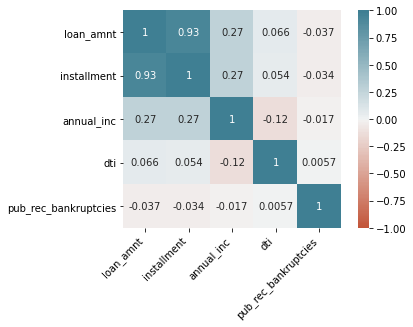

In [40]:
ax = sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Observation: 
- Installament and Loan Amount are positively correlated (strong)
- dti and annual income are negatively correlated (weak)

In [41]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  \
0       5000   36 months   10.65%       162.87     B        B2   
1       2500   60 months   15.27%        59.83     C        C4   
2       2400   36 months   15.96%        84.33     C        C5   
3      10000   36 months   13.49%       339.31     C        C1   
4       3000   60 months   12.69%        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
4     Source Verified  Dec-11      Current           other         OR  17.94   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [42]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [43]:
loan_df[loan_df.loan_status == 'Current'].shape

(1140, 17)

##### Note: We know that loan applications whose loan_status is Current are not relevant as these applicants cannot be classified as defaulters / non-defaulters as of now and hence these rows can be dropped

In [44]:
loan_df = loan_df[~(loan_df.loan_status == 'Current')]

In [45]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  \
0       5000   36 months   10.65%       162.87     B        B2   
1       2500   60 months   15.27%        59.83     C        C4   
2       2400   36 months   15.96%        84.33     C        C5   
3      10000   36 months   13.49%       339.31     C        C1   
5       5000   36 months    7.90%       156.46     A        A4   

              emp_title emp_length home_ownership  annual_inc  \
0                   NaN  10+ years           RENT     24000.0   
1                 Ryder   < 1 year           RENT     30000.0   
2                   NaN  10+ years           RENT     12252.0   
3   AIR RESOURCES BOARD  10+ years           RENT     49200.0   
5  Veolia Transportaton    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

In [46]:
loan_df.shape

(38577, 17)

###### Observation: Approximately 2.8% rows have been dropped from the data set

---

### Imputing Missing Values

In [47]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df)), 2)

##### The following columns have missing values which can be imputed

In [48]:
miss_percentage.loc[miss_percentage > 0].index.to_list()

['emp_title', 'emp_length', 'pub_rec_bankruptcies']

In [49]:
miss_percentage.loc[miss_percentage > 0]

emp_title               6.19
emp_length              2.68
pub_rec_bankruptcies    1.81
dtype: float64

#### Employee Title

In [50]:
loan_df.emp_title.value_counts()

US Army                                131
Bank of America                        107
IBM                                     65
AT&T                                    57
Kaiser Permanente                       56
                                      ... 
Jensen Graphics and Printing             1
MARIANA'S TAX SERVICES                   1
Whitley Penn LLP                         1
Northern Powerline Constructors Inc      1
BERDON LLP                               1
Name: emp_title, Length: 28027, dtype: int64

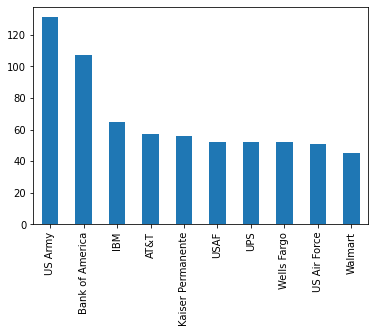

In [51]:
loan_df.emp_title.value_counts()[0:10].plot(kind='bar')
plt.show()

In [52]:
loan_df.emp_title.mode()

0    US Army
dtype: object

##### Note: Dropping emp_title
6% of the data (~1800 entries) is missing in emp_title, however, the most frequenty occuring emp_title (US Army) is ~0.44% (134 entries), hence filling this column with mode will skew the data.   
Moreover, many of the emp_titles are in small numbers, so it may not be fruitful to analyze this column.

In [53]:
loan_df.drop(['emp_title'], axis=1, inplace=True)

In [54]:
loan_df.shape

(38577, 16)

---

#### Employee Length (length of employment)

In [55]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### Normalizing Employee Length
- Remove years
- Remove year
- Replace < 1 with 0
- Replace 10+ with 10
- convert to numeric data

In [56]:
def clean_up(x):
    str_x = str(x)
    if str(x) == 'nan':
        return x
    else:
        normalized = str_x.replace('years', '').replace('year', '').replace('< 1', '0').replace('10+', '10')
        return int(normalized)

In [57]:
loan_df.emp_length = loan_df.emp_length.apply(clean_up)

In [58]:
loan_df.emp_length.value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [59]:
100*loan_df.emp_length.value_counts()/sum(loan_df.emp_length.value_counts())

10.0    22.608140
0.0     12.007245
2.0     11.429256
3.0     10.686128
4.0      8.901556
5.0      8.507351
1.0      8.440763
6.0      5.774558
7.0      4.557319
8.0      3.822182
9.0      3.265502
Name: emp_length, dtype: float64

In [60]:
loan_df.emp_length.isnull().sum()

1033

In [61]:
loan_df.emp_length.describe()

count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

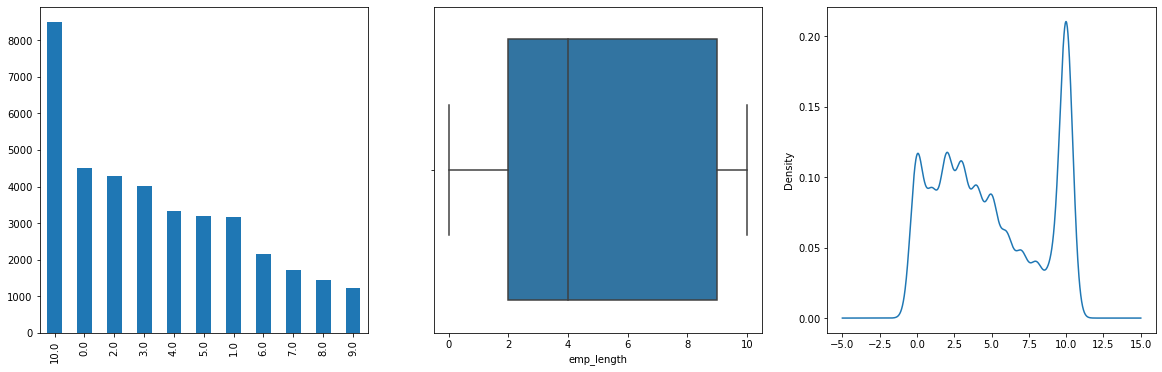

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

loan_df.emp_length.value_counts().plot(kind='bar', ax=ax1)
sns.boxplot(x='emp_length', data=loan_df, ax=ax2)
# sns.kdeplot(x='emp_length', data=loan_df, ax=ax3)
loan_df.emp_length.plot(kind='kde', ax=ax3)

plt.show()

##### Imputing null values of emp_length with mode
- Looking at the plots, it is more likely that the missing values will be filled with 10 (mode)
- This was originally categorical data, which is usually filled with mode

In [63]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace=True)

In [64]:
loan_df.emp_length.isnull().sum()

0

In [65]:
loan_df.emp_length.value_counts()

10.0    9521
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

##### Checking impact of imputing with mode via plots

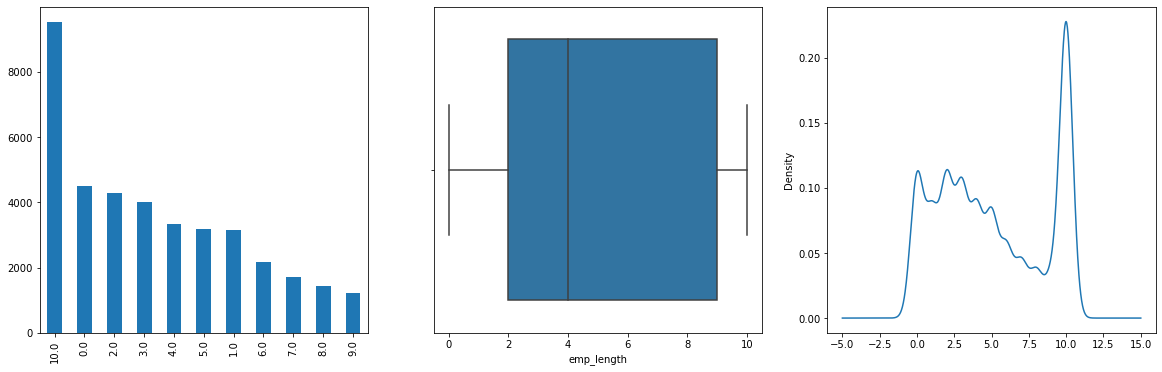

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

loan_df.emp_length.value_counts().plot(kind='bar', ax=ax1)
sns.boxplot(x='emp_length', data=loan_df, ax=ax2)
# sns.kdeplot(x='emp_length', data=loan_df, ax=ax3)
loan_df.emp_length.plot(kind='kde', ax=ax3)

plt.show()

##### Observation: The plots look similar before and after imputation, hence filling with mode is a good approach.

---

#### Public Bankruptcies

In [67]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
loan_df.pub_rec_bankruptcies.isnull().sum()

697

##### Imputing the missing values for public bankruptcies with 0 (mode) as out of 38k+ records 36k+ records are filled with 0

In [69]:
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace=True)

In [70]:
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [71]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

---

In [72]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            38577 non-null  float64
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  pub_rec_bankruptcie

##### Observation: 
- There are total 38577 records in the data
- All null values have been imputed except for mths_since_last_delinq

---


### Derived Columns

#### Converting issue_d column to Date Time format
- this will help in adding month and year columns

In [73]:
loan_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [74]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format="%b-%y")

In [75]:
loan_df['month'] = pd.DatetimeIndex(loan_df.issue_d).month

In [76]:
loan_df['year'] = pd.DatetimeIndex(loan_df.issue_d).year

In [77]:
loan_df['month_alpha'] = loan_df.issue_d.apply(lambda x: x.strftime('%b'))

In [78]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months   10.65%       162.87     B        B2        10.0   
1       2500   60 months   15.27%        59.83     C        C4         0.0   
2       2400   36 months   15.96%        84.33     C        C5        10.0   
3      10000   36 months   13.49%       339.31     C        C1        10.0   
5       5000   36 months    7.90%       156.46     A        A4         3.0   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti  pub_rec_bankruptcies  month  year  \
0     credit_card         AZ  27.65                   0.0     12  2011   
1             car         GA   1.00                   0.0     12  2011   
2  small_business         IL   8.72                   0.0     12  2011   
3           other         CA  20.00                   0.0     12  2011   
5         wedding         AZ  11.20                   0.0     12  2011   

  month_alpha  
0         Dec  
1         Dec  
2         Dec  
3         Dec  
5         Dec

---

##### Grade
- Deriving Column: Encoding such that A 6, B becomes 5 and so on

In [79]:
loan_df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [80]:
loan_df['grade_num'] = loan_df.grade.apply(lambda x: int(x.replace('A', '6').replace('B', '5').replace('C', '4').replace('D', '3').replace('E', '2').replace('F', '1').replace('G', '0')))

In [81]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months   10.65%       162.87     B        B2        10.0   
1       2500   60 months   15.27%        59.83     C        C4         0.0   
2       2400   36 months   15.96%        84.33     C        C5        10.0   
3      10000   36 months   13.49%       339.31     C        C1        10.0   
5       5000   36 months    7.90%       156.46     A        A4         3.0   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti  pub_rec_bankruptcies  month  year  \
0     credit_card         AZ  27.65                   0.0     12  2011   
1             car         GA   1.00                   0.0     12  2011   
2  small_business         IL   8.72                   0.0     12  2011   
3           other         CA  20.00                   0.0     12  2011   
5         wedding         AZ  11.20                   0.0     12  2011   

  month_alpha  grade_num  
0         Dec          5  
1         Dec          4  
2         Dec          4  
3         Dec          4  
5         Dec          6

---

##### Sub Grade
- Deriving Column: Encoding such that A1 becomes 66, A2 becomes 65, C3 becomes 42

In [82]:
loan_df.sub_grade.value_counts().head()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
Name: sub_grade, dtype: int64

###### Observation: Subgrade contains grade information as well

In [83]:
loan_df.loc[:,['grade', 'sub_grade']]

grade sub_grade
0         B        B2
1         C        C4
2         C        C5
3         C        C1
5         A        A4
...     ...       ...
39712     A        A4
39713     C        C1
39714     A        A4
39715     A        A2
39716     E        E2

[38577 rows x 2 columns]

In [84]:
loan_df['sub_grade_num'] = loan_df.sub_grade.apply(lambda x: x.replace('6', '1').replace('5', '2').replace('4', '3').replace('3', '2').replace('2', '1').replace('1', '0').replace('G', '0'))
loan_df['sub_grade_num'] = loan_df.sub_grade.apply(lambda x: int(x.replace('A', '6').replace('B', '5').replace('C', '4').replace('D', '3').replace('E', '2').replace('F', '1').replace('G', '0')))

In [85]:
loan_df.head()

loan_amnt        term int_rate  installment grade sub_grade  emp_length  \
0       5000   36 months   10.65%       162.87     B        B2        10.0   
1       2500   60 months   15.27%        59.83     C        C4         0.0   
2       2400   36 months   15.96%        84.33     C        C5        10.0   
3      10000   36 months   13.49%       339.31     C        C1        10.0   
5       5000   36 months    7.90%       156.46     A        A4         3.0   

  home_ownership  annual_inc verification_status  ...  loan_status  \
0           RENT     24000.0            Verified  ...   Fully Paid   
1           RENT     30000.0     Source Verified  ...  Charged Off   
2           RENT     12252.0        Not Verified  ...   Fully Paid   
3           RENT     49200.0     Source Verified  ...   Fully Paid   
5           RENT     36000.0     Source Verified  ...   Fully Paid   

          purpose addr_state    dti  pub_rec_bankruptcies  month  year  \
0     credit_card         AZ  27.65                   0.0     12  2011   
1             car         GA   1.00                   0.0     12  2011   
2  small_business         IL   8.72                   0.0     12  2011   
3           other         CA  20.00                   0.0     12  2011   
5         wedding         AZ  11.20                   0.0     12  2011   

   month_alpha grade_num  sub_grade_num  
0          Dec         5             52  
1          Dec         4             44  
2          Dec         4             45  
3          Dec         4             41  
5          Dec         6             64  

[5 rows x 21 columns]

---

##### Loan Status
Since there are two types of categorical values, we can convert them to a numeric type for better analysis
- charged off => 0
- paid => 1

Adding a loan_status_num column for future usage as per requirement

In [86]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [87]:
loan_df['loan_status_num'] = loan_df.loan_status.apply(lambda x: int(x.replace('Fully Paid', '1').replace('Charged Off', '0')))

In [88]:
loan_df['loan_status_num'].value_counts()

1    32950
0     5627
Name: loan_status_num, dtype: int64

---

### Normalizing Data

In [89]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  object        
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  float64       
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

#### Let's look at columns which have "object" as dtype (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html))

In [90]:
loan_df.select_dtypes('object')

term int_rate grade sub_grade home_ownership verification_status  \
0       36 months   10.65%     B        B2           RENT            Verified   
1       60 months   15.27%     C        C4           RENT     Source Verified   
2       36 months   15.96%     C        C5           RENT        Not Verified   
3       36 months   13.49%     C        C1           RENT     Source Verified   
5       36 months    7.90%     A        A4           RENT     Source Verified   
...           ...      ...   ...       ...            ...                 ...   
39712   36 months    8.07%     A        A4       MORTGAGE        Not Verified   
39713   36 months   10.28%     C        C1           RENT        Not Verified   
39714   36 months    8.07%     A        A4       MORTGAGE        Not Verified   
39715   36 months    7.43%     A        A2       MORTGAGE        Not Verified   
39716   36 months   13.75%     E        E2            OWN        Not Verified   

       loan_status             purpose addr_state month_alpha  
0       Fully Paid         credit_card         AZ         Dec  
1      Charged Off                 car         GA         Dec  
2       Fully Paid      small_business         IL         Dec  
3       Fully Paid               other         CA         Dec  
5       Fully Paid             wedding         AZ         Dec  
...            ...                 ...        ...         ...  
39712   Fully Paid    home_improvement         CO         Jul  
39713   Fully Paid         credit_card         NC         Jul  
39714   Fully Paid  debt_consolidation         MA         Jul  
39715   Fully Paid               other         MD         Jul  
39716   Fully Paid  debt_consolidation         MA         Jun  

[38577 rows x 10 columns]

##### term - 36 months / 60 months
- convert to 0/1 where 
- 0 represents smaller term length (36 months) & 
- 1 represents larger term length of 60 months

We can do this later in the analysis

In [91]:
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [92]:
# loan_df.term = loan_df.term.apply(lambda x: float(x.replace('36 months', 0).replace('60 months', 1)))

In [93]:
loan_df.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

---

##### interest rate
- convert to numeric by dropping percentage

In [94]:
loan_df.int_rate.value_counts().head()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
Name: int_rate, dtype: int64

In [95]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.replace('%', '')))

In [96]:
loan_df.int_rate.value_counts().head()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
Name: int_rate, dtype: int64

---

##### Home Ownersip
- replace NONE with RENT

In [97]:
loan_df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

###### Imputing NONE with mode (i.e. RENT)

In [98]:
loan_df.home_ownership = loan_df.home_ownership.apply(lambda x: x.replace('NONE', 'RENT'))

In [99]:
loan_df.home_ownership.value_counts()

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

---

##### Verification Status

In [100]:
loan_df.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

---

##### Purpose

In [101]:
loan_df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

---

##### State (Address State - US)

In [102]:
loan_df.addr_state.value_counts().head()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
Name: addr_state, dtype: int64

In [103]:
loan_df.select_dtypes('object').head(2)

term grade sub_grade home_ownership verification_status  loan_status  \
0   36 months     B        B2           RENT            Verified   Fully Paid   
1   60 months     C        C4           RENT     Source Verified  Charged Off   

       purpose addr_state month_alpha  
0  credit_card         AZ         Dec  
1          car         GA         Dec

---

#### Let's look at numeric columns

In [106]:
loan_df.select_dtypes('int64').head(2)

loan_amnt  month  year  grade_num  sub_grade_num  loan_status_num
0       5000     12  2011          5             52                1
1       2500     12  2011          4             44                0

In [107]:
loan_df.select_dtypes('float64').head(2)

int_rate  installment  emp_length  annual_inc    dti  pub_rec_bankruptcies
0     10.65       162.87        10.0     24000.0  27.65                   0.0
1     15.27        59.83         0.0     30000.0   1.00                   0.0

#### Setting dtype to int for bankruptcies and length of employment 
- as these values are distinct integers


In [108]:
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype('int64')
loan_df.annual_inc = loan_df.annual_inc.astype('int64')
loan_df.emp_length = loan_df.emp_length.astype('int64')

#### Setting dtype to float for loan_amnt and annual_inc
- as these values are large and continous in natures

In [109]:
loan_df.loan_amnt = loan_df.loan_amnt.astype('float64')
loan_df.annual_inc = loan_df.annual_inc.astype('float64')

In [111]:
loan_df.select_dtypes('int64').head(2)

emp_length  pub_rec_bankruptcies  month  year  grade_num  sub_grade_num  \
0          10                     0     12  2011          5             52   
1           0                     0     12  2011          4             44   

   loan_status_num  
0                1  
1                0

In [112]:
loan_df.select_dtypes('float64').head(2)

loan_amnt  int_rate  installment  annual_inc    dti
0     5000.0     10.65       162.87     24000.0  27.65
1     2500.0     15.27        59.83     30000.0   1.00

---

### Deriving Categorical Columns

In [115]:
loan_df.shape

(38577, 22)

In [116]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  int64         
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

In [117]:
categorical_data = loan_df.select_dtypes('object').columns.to_list()
print(categorical_data)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'month_alpha']


In [118]:
integer_data = loan_df.select_dtypes('int64').columns.to_list()
print(integer_data)

['emp_length', 'pub_rec_bankruptcies', 'month', 'year', 'grade_num', 'sub_grade_num', 'loan_status_num']


In [119]:
continous_float_data = loan_df.select_dtypes('float64').columns.to_list()
print(continous_float_data)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']


---

##### Loan Amount can be categorized into 5 categories
- very_small_loan
- small_loan
- medium_loanm
- large_loan
- very_large_loan

This can be done using qcut (divide data into 5 equal quantiles)

In [129]:
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [126]:
labels = ['very_small_loan', 'small_loan', 'medium_loan', 'large_loan', 'very_large_loan']
loan_df['loan_amount_cat'] = pd.qcut(loan_df.loan_amnt, q=5, precision=0, labels=labels)

In [127]:
loan_df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0   36 months     10.65       162.87     B        B2          10   
1     2500.0   60 months     15.27        59.83     C        C4           0   

  home_ownership  annual_inc verification_status  ... addr_state    dti  \
0           RENT     24000.0            Verified  ...         AZ  27.65   
1           RENT     30000.0     Source Verified  ...         GA   1.00   

  pub_rec_bankruptcies month  year  month_alpha  grade_num  sub_grade_num  \
0                    0    12  2011          Dec          5             52   
1                    0    12  2011          Dec          4             44   

  loan_status_num  loan_amount_cat  
0               1  very_small_loan  
1               0  very_small_loan  

[2 rows x 23 columns]

---

#### Interest can be binned into 5 categories
- very_low
- low
- medium
- high
- very_high

In [128]:
loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [130]:
pd.qcut(loan_df.int_rate, q=5).unique()

[(7.9, 10.99], (15.21, 24.4], (12.84, 15.21], (5.419, 7.9], (10.99, 12.84]]
Categories (5, interval[float64]): [(5.419, 7.9] < (7.9, 10.99] < (10.99, 12.84] < (12.84, 15.21] < (15.21, 24.4]]

In [131]:
labels = ['very_low', 'low', 'medium', 'high', 'very_high']
loan_df['int_rate_cat'] = pd.qcut(loan_df.int_rate, q=5, labels=labels)

In [132]:
loan_df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0   36 months     10.65       162.87     B        B2          10   
1     2500.0   60 months     15.27        59.83     C        C4           0   

  home_ownership  annual_inc verification_status  ...    dti  \
0           RENT     24000.0            Verified  ...  27.65   
1           RENT     30000.0     Source Verified  ...   1.00   

  pub_rec_bankruptcies month  year  month_alpha  grade_num  sub_grade_num  \
0                    0    12  2011          Dec          5             52   
1                    0    12  2011          Dec          4             44   

   loan_status_num  loan_amount_cat  int_rate_cat  
0                1  very_small_loan           low  
1                0  very_small_loan     very_high  

[2 rows x 24 columns]

---

#### Debt To Income can be binned into 5 categories
- very_low
- low
- medium
- high
- very_high

In [133]:
loan_df.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
27.20      1
28.08      1
27.52      1
28.54      1
Name: dti, Length: 2853, dtype: int64

In [134]:
pd.qcut(loan_df.dti, q=5).unique()

[(19.71, 29.99], (-0.001, 6.91], (6.91, 11.35], (15.31, 19.71], (11.35, 15.31]]
Categories (5, interval[float64]): [(-0.001, 6.91] < (6.91, 11.35] < (11.35, 15.31] < (15.31, 19.71] < (19.71, 29.99]]

In [135]:
labels = ['very_low', 'low', 'medium', 'high', 'very_high']
loan_df['dti_cat'] = pd.qcut(loan_df.dti, q=5, labels=labels)

In [136]:
loan_df.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0     5000.0   36 months     10.65       162.87     B        B2          10   
1     2500.0   60 months     15.27        59.83     C        C4           0   

  home_ownership  annual_inc verification_status  ... pub_rec_bankruptcies  \
0           RENT     24000.0            Verified  ...                    0   
1           RENT     30000.0     Source Verified  ...                    0   

  month  year month_alpha  grade_num  sub_grade_num  loan_status_num  \
0    12  2011         Dec          5             52                1   
1    12  2011         Dec          4             44                0   

   loan_amount_cat int_rate_cat    dti_cat  
0  very_small_loan          low  very_high  
1  very_small_loan    very_high   very_low  

[2 rows x 25 columns]

---

In [137]:
loan_df.select_dtypes('float64').head(2)

loan_amnt  int_rate  installment  annual_inc    dti
0     5000.0     10.65       162.87     24000.0  27.65
1     2500.0     15.27        59.83     30000.0   1.00

In [138]:
loan_df.select_dtypes('int64').head(2)

emp_length  pub_rec_bankruptcies  month  year  grade_num  sub_grade_num  \
0          10                     0     12  2011          5             52   
1           0                     0     12  2011          4             44   

   loan_status_num  
0                1  
1                0

In [139]:
loan_df.select_dtypes('object').head(2)

term grade sub_grade home_ownership verification_status  loan_status  \
0   36 months     B        B2           RENT            Verified   Fully Paid   
1   60 months     C        C4           RENT     Source Verified  Charged Off   

       purpose addr_state month_alpha  
0  credit_card         AZ         Dec  
1          car         GA         Dec

In [142]:
loan_df.describe()

loan_amnt      int_rate   installment    emp_length    annual_inc  \
count  38577.000000  38577.000000  38577.000000  38577.000000  3.857700e+04   
mean   11047.025430     11.932219    322.466318      5.076445  6.877797e+04   
std     7348.441646      3.691327    208.639215      3.602917  6.421868e+04   
min      500.000000      5.420000     15.690000      0.000000  4.000000e+03   
25%     5300.000000      8.940000    165.740000      2.000000  4.000000e+04   
50%     9600.000000     11.710000    277.860000      4.000000  5.886800e+04   
75%    15000.000000     14.380000    425.550000      9.000000  8.200000e+04   
max    35000.000000     24.400000   1305.190000     10.000000  6.000000e+06   

                dti  pub_rec_bankruptcies         month          year  \
count  38577.000000          38577.000000  38577.000000  38577.000000   
mean      13.272727              0.042694      7.114757   2010.309070   
std        6.673044              0.202809      3.408523      0.882658   
min        0.000000              0.000000      1.000000   2007.000000   
25%        8.130000              0.000000      4.000000   2010.000000   
50%       13.370000              0.000000      7.000000   2011.000000   
75%       18.560000              0.000000     10.000000   2011.000000   
max       29.990000              2.000000     12.000000   2011.000000   

          grade_num  sub_grade_num  loan_status_num  
count  38577.000000   38577.000000     38577.000000  
mean       4.446639      47.518781         0.854136  
std        1.380003      14.138758         0.352975  
min        0.000000       1.000000         0.000000  
25%        4.000000      41.000000         1.000000  
50%        5.000000      52.000000         1.000000  
75%        6.000000      61.000000         1.000000  
max        6.000000      65.000000         1.000000

---

## Univariate Analysis
- Perform univariate analysis on each of the columns

In [143]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_length            38577 non-null  int64         
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  addr_state      

##### Loan Amount

In [144]:
loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### Observation: The minimum loan applied is 500USD and maximum loan applied is 35000 USD

KeyError: 0

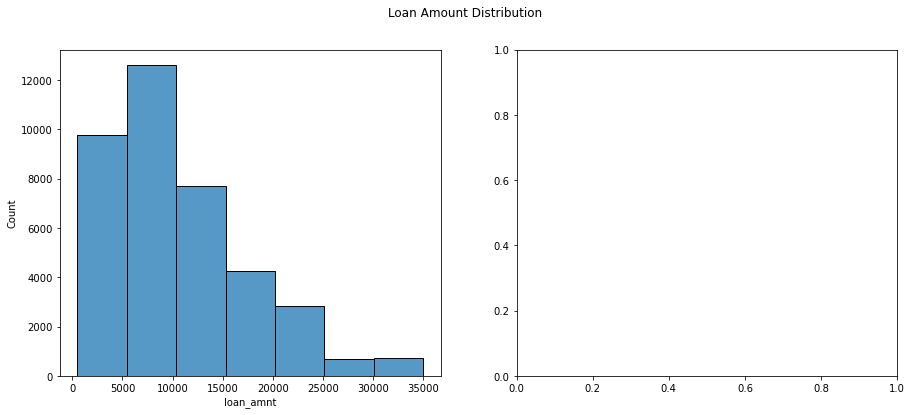

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

plt.suptitle('Loan Amount Distribution')
sns.histplot(loan_df.loan_amnt, bins=7, ax=ax1)
loan_df.loan_amnt.value_counts()[0:10].plot(kind='bar', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xlabel('Loan Amount (Top 10)')
ax2.set_ylabel('Number of Applicants')
ax1.set_xlabel('Loan Amount (Range)')
ax1.set_ylabel('Number of Applicants')
plt.show()

Observations:
- Most people are applying for a loan within a range of 5000 - 10000 USD

---


##### Term

In [192]:
loan_df.term.value_counts()

 36 months    28819
 60 months     9372
Name: term, dtype: int64

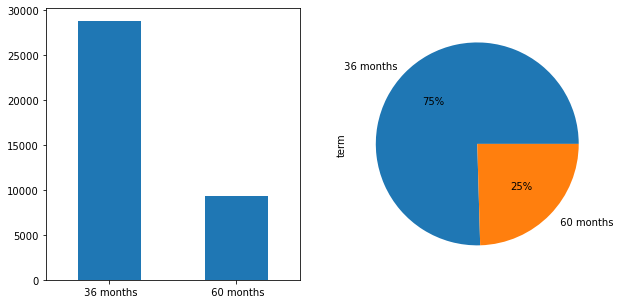

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

loan_df.term.value_counts().plot(kind='bar', ax=ax1)
loan_df.term.value_counts().plot(kind='pie', ax=ax2, autopct='%1.0f%%')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
plt.show()

In [194]:
loan_df.term.value_counts(normalize=True)*100

 36 months    75.460187
 60 months    24.539813
Name: term, dtype: float64

##### Every 3 out of 4 people choose 36 months term loan

---

In [195]:
col_large_unique = []
col_small_unique = []
for col in loan_df:
    if len(loan_df[col].unique()) > 14:
#         print(col, ':',len(loan_df[col].unique()))
        col_large_unique.append(col)
    else:
        col_small_unique.append(col)

# subgrade num will be analyzed when analyzing sub_grade itself
col_large_unique.remove('sub_grade_num')
# date column should not be analyzed as categorical data
col_large_unique.remove('issue_d')

# grade_num plots will be covered in grade
col_small_unique.remove('grade_num')
# loan_status_num plots will be covered in loan_status
col_small_unique.remove('loan_status_num')

print('large:', col_large_unique)
print('small:', col_small_unique)

ValueError: list.remove(x): x not in list

In [ ]:
def plot_large(loan_df, column):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
    plt.suptitle(column)
    try:
        sns.histplot(loan_df[column], bins=7, ax=ax1)
        ax1.set_xticks(ax1.get_xticklabels(), rotation=90)
    except:
        pass
    try:
        if column == 'dti':
            sns.kdeplot(x='dti', data=loan_df, ax=ax2)
        else:
            loan_df[column].value_counts()[0:10].plot(kind='bar', ax=ax2)
    except:
        try:
            sns.kdeplot(x=column, data=loan_df, ax=ax2)
        except:
            pass
        pass
    try:
        if column == 'sub_grade':
            sns.boxplot(x='sub_grade_num', data=loan_df, ax=ax3)
            ax3.set_xlabel('Sub Grade Encoded')
        else:
            sns.boxplot(x=column, data=loan_df, ax=ax3)
    except:
        pass
    plt.show()

In [ ]:
import traceback

for column in col_large_unique:
    try:
        plot_large(loan_df, column)
        if column == 'annual_inc':
            print('Plotting Annual Income after removing outliers (discard >99th percentile)')
            plot_large(loan_df[loan_df['annual_inc']<loan_df['annual_inc'].quantile(q=0.99)], column)
            print(loan_df[column].describe())
        elif column == 'sub_grade':
            print(loan_df['sub_grade_num'].describe())
        elif column == 'emp_length':
            print(loan_df[column].describe())
            print(loan_df['emp_length'].value_counts())
        else:
#             plot_large(loan_df, column)
            print(loan_df[column].describe())
            
    except:
        pass
#         print('cannot plot for', i)
        print(traceback.format_exc())

### Observation from features that have more than 14 distinct values
#### Loan Amount
- Maximum people are taking loans between 5000-10000 USD
- 50% (25th percentile to 75th percentile) of the loans are between 5k USD to 15k USD
- 30k+ USD can be considered as outliers

#### Interest Rate
- For 25% of the applicants, the interest rate is less than 8.94%
- ~50% of the applicatns have interest rate between ~9% to 14%
- Minium interest rate is 5.42% and Maximum is 24.4%

#### Installment
- 75% of the applicants are paying installment less than 425 USD
- The installment can go as low as 15 dollars
- The installment distribution is right skewed (median is quite less than mean)

#### Sub Grade
- 75% of the Applications have a grade between A to C. 
- The distribution is skewed towards people having higher grade (A being the highest)
- People having A4, B3, A5 sub grades are most common
- People having G grade apply but are seldom in number. 

#### Annual Income
- There is a large range in annual income (4k USD to 6Million USD).
- The 75th percentile has annual income of 82k USD while the maximum is 6 Million, indicating that there are outliers in the higher range.

#### Address State
- Most applications are from California, New York and Florida
- 18% applications are from California

#### DTI
- The Debt to Income ratio is approximately normally distributed
- The spread of the data is wide as the standard deviation is 6.7%
- The mean and median for DTI is 13.3%

In [196]:
loan_df[loan_df['annual_inc']<loan_df['annual_inc'].quantile(q=0.99)].shape

(37808, 24)

In [197]:
loan_df.shape

(38191, 24)

##### Removing outliers (>99th percentile values) from annual income
- Losing 386 (1%) values in the process

In [198]:
loan_df = loan_df[loan_df['annual_inc']<loan_df['annual_inc'].quantile(q=0.99)]

In [199]:
loan_df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
issue_d                                                                    
2011-12-01     5000.0   36 months     10.65       162.87     B        B2   
2011-12-01     2500.0   60 months     15.27        59.83     C        C4   
2011-12-01     2400.0   36 months     15.96        84.33     C        C5   
2011-12-01    10000.0   36 months     13.49       339.31     C        C1   
2011-12-01     5000.0   36 months      7.90       156.46     A        A4   

            emp_length home_ownership  annual_inc verification_status  \
issue_d                                                                 
2011-12-01          10           RENT     24000.0            Verified   
2011-12-01           0           RENT     30000.0     Source Verified   
2011-12-01          10           RENT     12252.0        Not Verified   
2011-12-01          10           RENT     49200.0     Source Verified   
2011-12-01           3           RENT     36000.0     Source Verified   

            loan_status         purpose addr_state    dti  \
issue_d                                                     
2011-12-01   Fully Paid     credit_card         AZ  27.65   
2011-12-01  Charged Off             car         GA   1.00   
2011-12-01   Fully Paid  small_business         IL   8.72   
2011-12-01   Fully Paid           other         CA  20.00   
2011-12-01   Fully Paid         wedding         AZ  11.20   

            pub_rec_bankruptcies  month  year month_alpha  grade_num  \
issue_d                                                                
2011-12-01                     0     12  2011         Dec          5   
2011-12-01                     0     12  2011         Dec          4   
2011-12-01                     0     12  2011         Dec          4   
2011-12-01                     0     12  2011         Dec          4   
2011-12-01                     0     12  2011         Dec          6   

            sub_grade_num  loan_status_num  loan_amount_cat int_rate_cat  \
issue_d                                                                    
2011-12-01             52                1  very_small_loan          low   
2011-12-01             44                0  very_small_loan    very_high   
2011-12-01             45                1  very_small_loan    very_high   
2011-12-01             41                1      medium_loan         high   
2011-12-01             64                1  very_small_loan     very_low   

              dti_cat  
issue_d                
2011-12-01  very_high  
2011-12-01   very_low  
2011-12-01        low  
2011-12-01  very_high  
2011-12-01        low

In [200]:
def plot_small(loan_df, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    if column in ['purpose', 'emp_length']:
        sns.countplot(y = column, data=loan_df, ax=ax1,
                     order = loan_df[column].value_counts().index)
        loan_df[column].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    elif column == 'month':
        sns.countplot(y = 'month_alpha', data=loan_df, ax=ax1,
                     order = loan_df['month_alpha'].value_counts().index)
        loan_df['month_alpha'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    else:
        sns.countplot(x = column, data=loan_df, ax=ax1)
        loan_df[column].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    plt.suptitle(column)
    plt.show()

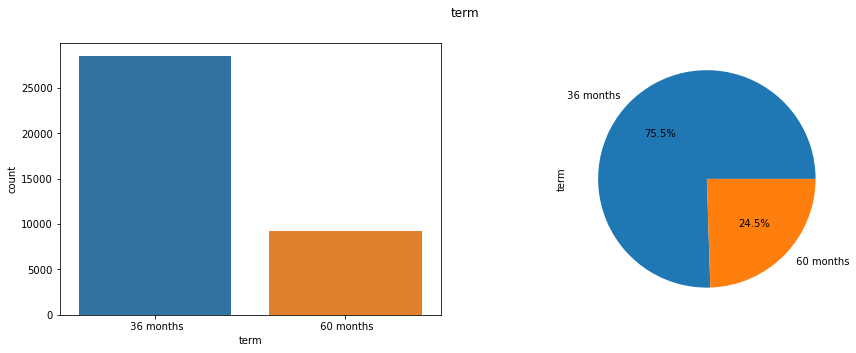

 36 months    28549
 60 months     9259
Name: term, dtype: int64


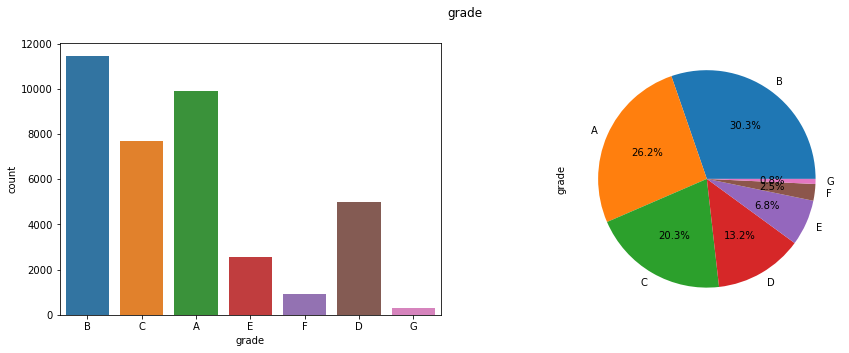

B    11452
A     9906
C     7676
D     4976
E     2579
F      935
G      284
Name: grade, dtype: int64


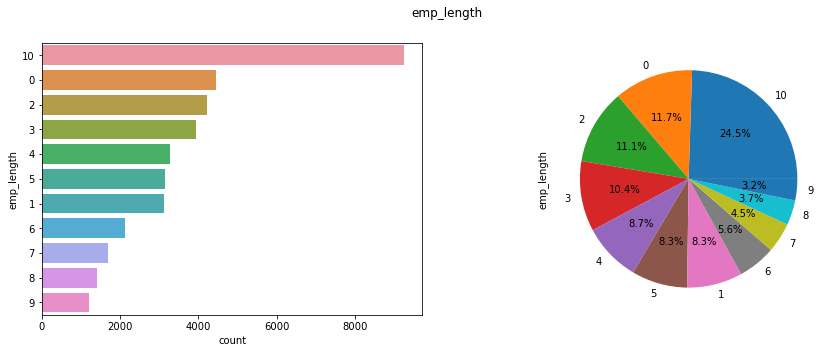

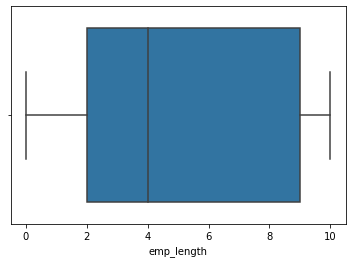

10    9261
0     4440
2     4210
3     3948
4     3275
5     3136
1     3121
6     2130
7     1685
8     1398
9     1204
Name: emp_length, dtype: int64


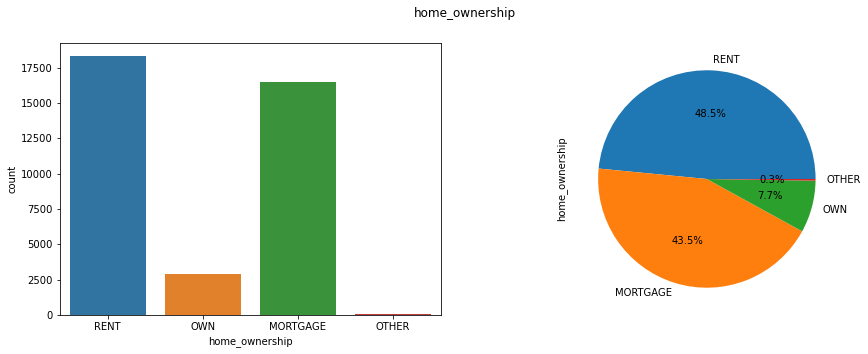

RENT        18325
MORTGAGE    16464
OWN          2924
OTHER          95
Name: home_ownership, dtype: int64


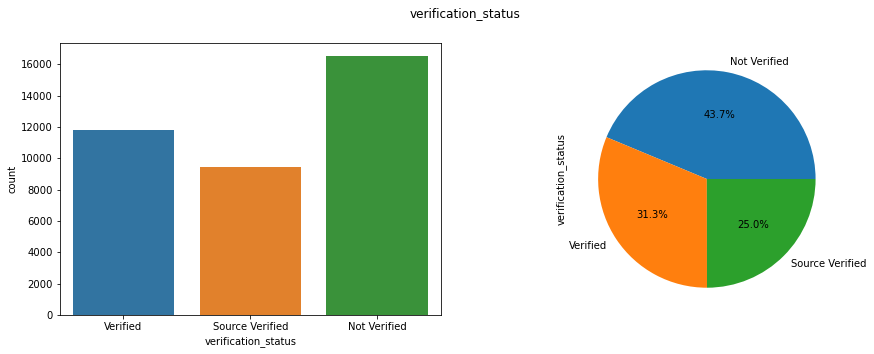

Not Verified       16529
Verified           11835
Source Verified     9444
Name: verification_status, dtype: int64


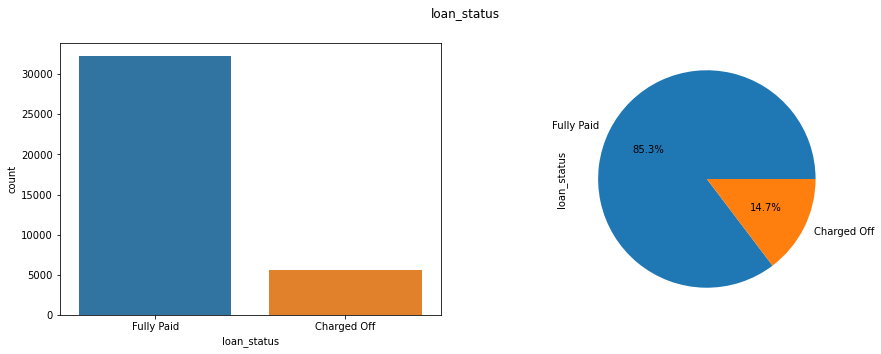

Fully Paid     32259
Charged Off     5549
Name: loan_status, dtype: int64


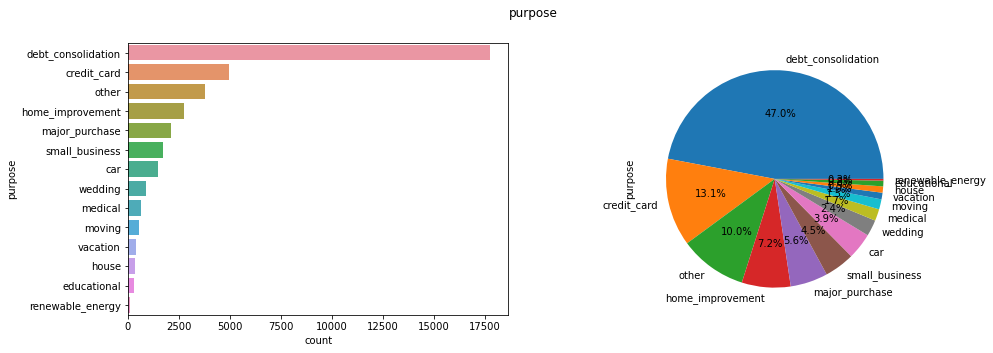

debt_consolidation    17779
credit_card            4939
other                  3790
home_improvement       2740
major_purchase         2106
small_business         1698
car                    1479
wedding                 909
medical                 661
moving                  566
vacation                372
house                   353
educational             319
renewable_energy         97
Name: purpose, dtype: int64


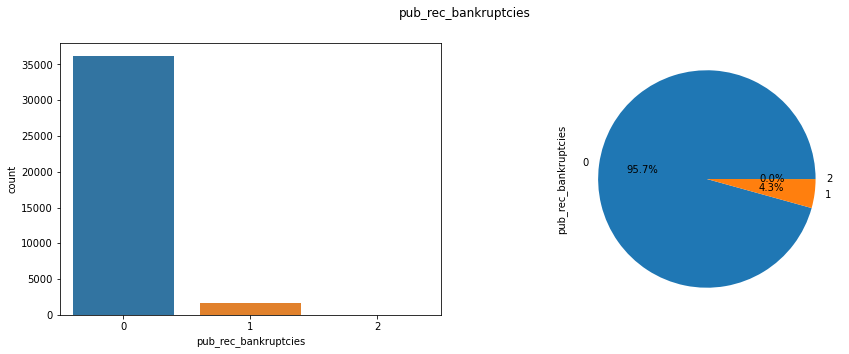

0    36179
1     1624
2        5
Name: pub_rec_bankruptcies, dtype: int64


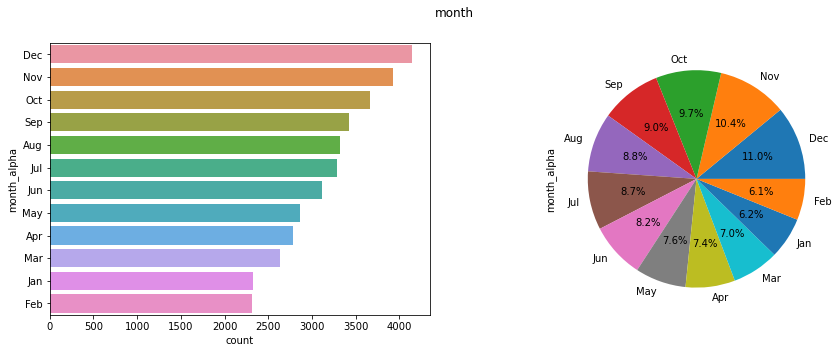

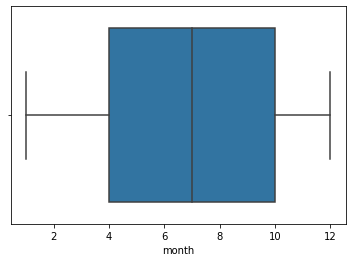

12    4145
11    3930
10    3669
9     3420
8     3321
7     3288
6     3112
5     2860
4     2780
3     2637
1     2331
2     2315
Name: month, dtype: int64


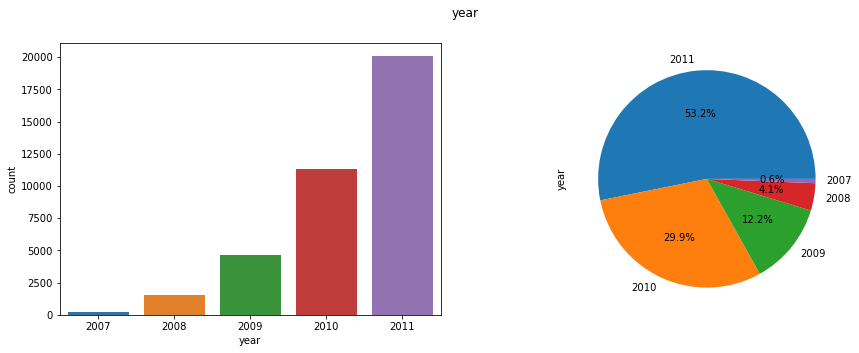

2011    20101
2010    11317
2009     4612
2008     1538
2007      240
Name: year, dtype: int64


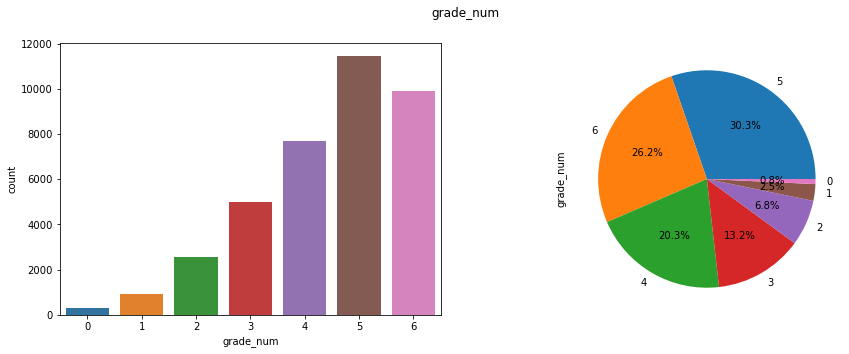

5    11452
6     9906
4     7676
3     4976
2     2579
1      935
0      284
Name: grade_num, dtype: int64


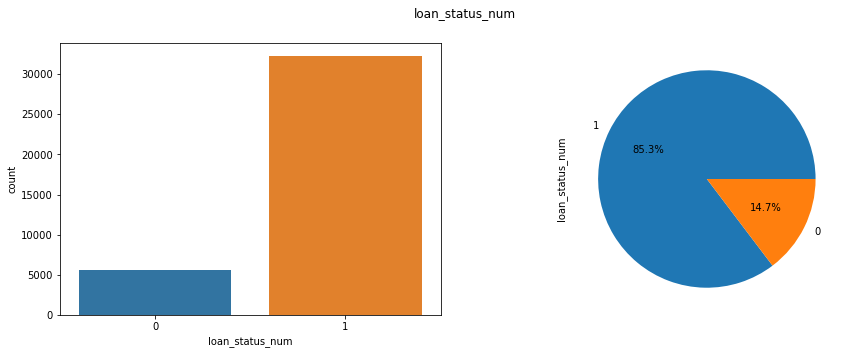

1    32259
0     5549
Name: loan_status_num, dtype: int64


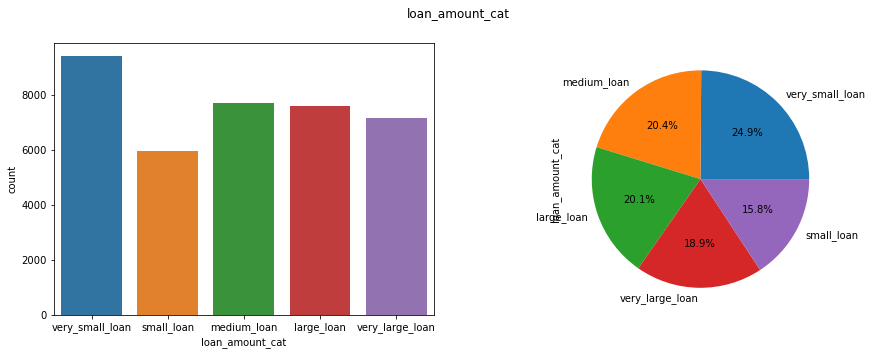

very_small_loan    9410
medium_loan        7696
large_loan         7587
very_large_loan    7159
small_loan         5956
Name: loan_amount_cat, dtype: int64


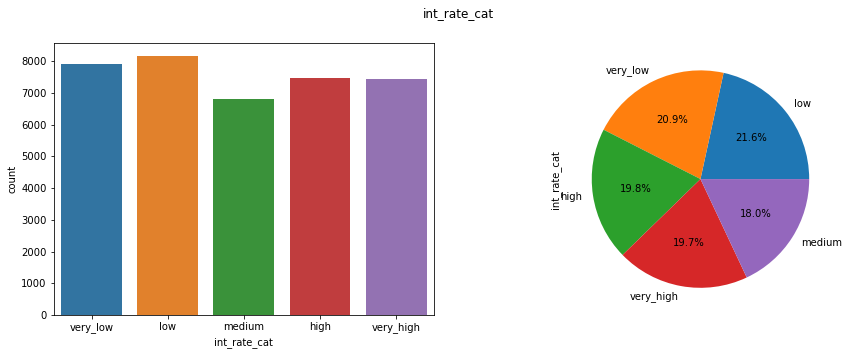

low          8162
very_low     7907
high         7481
very_high    7451
medium       6807
Name: int_rate_cat, dtype: int64


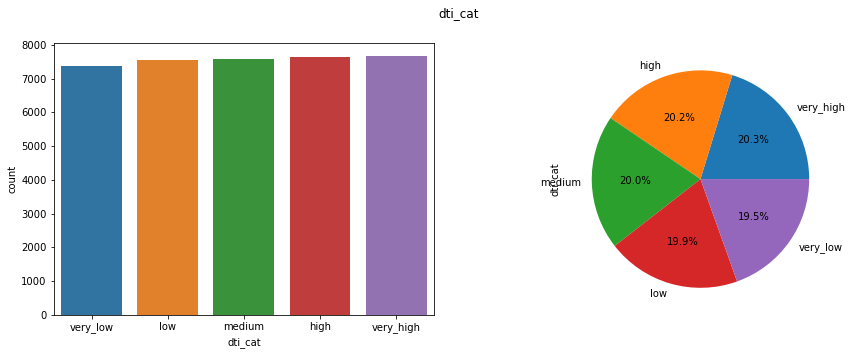

very_high    7665
high         7650
medium       7573
low          7537
very_low     7383
Name: dti_cat, dtype: int64


In [201]:
for column in col_small_unique:
    if column == 'month_alpha':
        continue
    plot_small(loan_df, column)
    if column in ['emp_length', 'month']:
        sns.boxplot(x=column, data=loan_df)
        plt.show()
    print(loan_df[column].value_counts())

### Observations from features with less than 14 distinct values

### term
- 3/4 people choose 36 months term. It is likely their loan amount is low.

#### grade
- Most applicants have a risk grade of "B" (30.3%)
- 75% of the applicants have grades "A", "B" or "C"
- In the remaining 25% of applications, grade "D" is the most common

#### Employment Length
- There is a decline in number of loan applicants after 4 years of employment. A splike is again observed at 10+ years of employment. It could indicate that applicants between 4 to 9 years of employment are paying their previous loan and hence don't apply for another one. 
- 50% of loan applicants are between 0 to 4 years of employement. People having less than 1 year of employment also account for a large number of applicants (~11%). 

#### Home Ownership
- 90% of applicants are either living in a rented house or have a mortgage on their home
- Only 7% people have a house of their own

#### Verification Status
- 43% of the applicants don't have a source of income which is verified by LC or any other source. It might be that these people default the most.

#### Loan Status
- 14.6% applicants have defaulted on their loan

#### Purpose
- ~47% of the loan is taken for debt consolidation (i.e. paying previous loan by taking another loan)
- Similarly the next most popular purpose is the payment of credit card bill. This could be because credit cards charge a much higher interest than regular loans.
- For loans such as house loan, the applicants are less, but the amount is likely to be high

#### Public Record Bankruptcies
- Majority of the applicants (~96%) have never filed for bankruptcy
- 4.2% people have filed for bankruptcy once
- 5 people who filed for bakruptcy twice still got a loan once more

#### Month
- Most loans have been applied in the last 2 months of the year (4000+ in each month). This could be because banks generally provide a lower interest rate to meet targets at the end of the year.
- The tendency to apply for a loan keeps on gradually increasing from first quarter to last quarter. 
*Quarter wise share*
- First Quarter: Jan-Mar (~21%)
- Second Quarter: Apr-Jun (~23%)
- Third Quarter: July-Sep (~26%)
- Fourth Quarter: Oct-Dec (~30%)


#### Employment Length
- There is a decline in number of loan applicants after 4 years of employment. A splike is again observed at 10+ years of employment. It could indicate that applicants between 4 to 9 years of employment are paying their previous loan and hence don't apply for another one. 
- 50% of loan applicants are between 0 to 4 years of employement. People having less than 1 year of employment also account for a large number of applicants (~11%).


### Year
- Most loans have been provided in the year 2011
- The loans given out has incresed steadily from 2007 to 2011. One potential reason is because 2007-2008 was when the great depression happened.

---

#### Time Series Analysis

In [202]:
loan_df_checkpoint = loan_df.copy()

In [203]:
loan_df.set_index('issue_d', inplace=True)

KeyError: "None of ['issue_d'] are in the columns"

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
loan_df['pub_rec_bankruptcies'].plot(grid=True)

In [ ]:
loan_df.describe()

In [ ]:
loan_df[loan_df.pub_rec_bankruptcies == 2]

In [ ]:
loan_df.loan_amnt.plot()

In [ ]:
loan_df[(loan_df.index >= "2011-01-01")].loan_amnt.plot()

In [ ]:
loan_df[(loan_df.index >= "2011-01-01")].annual_inc.plot()

#### Observation: No particular trend is observed when analyzing the time series data

---

### Bivariate Analysis

---

#### Checking Correlation between numeric values

In [204]:
loan_df.corr()

loan_amnt  int_rate  installment  emp_length  \
loan_amnt              1.000000  0.296080     0.931631    0.129735   
int_rate               0.296080  1.000000     0.273145   -0.012137   
installment            0.931631  0.273145     1.000000    0.101910   
emp_length             0.129735 -0.012137     0.101910    1.000000   
annual_inc             0.413820  0.062434     0.409970    0.150207   
dti                    0.077335  0.113291     0.067276    0.049693   
pub_rec_bankruptcies  -0.031590  0.086033    -0.029166    0.071790   
month                  0.052441  0.025873     0.029687    0.023075   
year                   0.106691  0.036434     0.049386    0.131991   
grade_num             -0.281835 -0.947978    -0.259585    0.010822   
sub_grade_num         -0.271924 -0.927773    -0.251497    0.008865   
loan_status_num       -0.063149 -0.212919    -0.030484   -0.023960   

                      annual_inc       dti  pub_rec_bankruptcies     month  \
loan_amnt               0.413820  0.077335             -0.031590  0.052441   
int_rate                0.062434  0.113291              0.086033  0.025873   
installment             0.409970  0.067276             -0.029166  0.029687   
emp_length              0.150207  0.049693              0.071790  0.023075   
annual_inc              1.000000 -0.096517             -0.014178  0.017022   
dti                    -0.096517  1.000000              0.005950  0.015448   
pub_rec_bankruptcies   -0.014178  0.005950              1.000000 -0.019629   
month                   0.017022  0.015448             -0.019629  1.000000   
year                    0.035935  0.092565              0.012738 -0.035662   
grade_num              -0.067943 -0.098398             -0.079273  0.030025   
sub_grade_num          -0.065560 -0.094277             -0.077032  0.027882   
loan_status_num         0.063837 -0.043353             -0.046964 -0.024730   

                          year  grade_num  sub_grade_num  loan_status_num  
loan_amnt             0.106691  -0.281835      -0.271924        -0.063149  
int_rate              0.036434  -0.947978      -0.927773        -0.212919  
installment           0.049386  -0.259585      -0.251497        -0.030484  
emp_length            0.131991   0.010822       0.008865        -0.023960  
annual_inc            0.035935  -0.067943      -0.065560         0.063837  
dti                   0.092565  -0.098398      -0.094277        -0.043353  
pub_rec_bankruptcies  0.012738  -0.079273      -0.077032        -0.046964  
month                -0.035662   0.030025       0.027882        -0.024730  
year                  1.000000   0.005515       0.001787        -0.026258  
grade_num             0.005515   1.000000       0.995274         0.202700  
sub_grade_num         0.001787   0.995274       1.000000         0.197983  
loan_status_num      -0.026258   0.202700       0.197983         1.000000

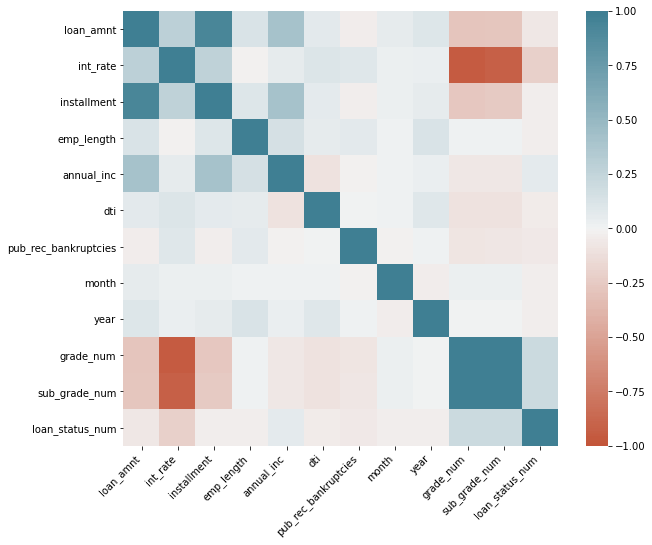

In [205]:
plt.figure(figsize=(10,8))

ax = sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

---

In [206]:
loan_df.select_dtypes('object').columns.to_list()

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'month_alpha']

In [207]:
loan_df.groupby(['grade'])[['annual_inc']].agg(['count','mean','median'])

annual_inc                       
           count          mean   median
grade                                  
A           9906  63079.717343  57000.0
B          11452  63044.676126  56517.0
C           7676  61891.451277  55000.0
D           4976  63685.379421  57600.0
E           2579  70703.577356  63000.0
F            935  75731.721925  70000.0
G            284  82467.316901  76902.0

In [208]:
loan_df.groupby(['term'])['loan_amnt'].agg(['count','mean','median'])

count          mean   median
term                                    
 36 months  28549   9452.038600   8000.0
 60 months   9259  15313.862188  14400.0

In [209]:
loan_df.groupby(['home_ownership'])['loan_amnt'].agg(['count','mean','median'])

count          mean   median
home_ownership                              
MORTGAGE        16464  12236.099976  10000.0
OTHER              95  10368.157895   9600.0
OWN              2924   9958.011286   8000.0
RENT            18325   9827.009550   8000.0

<AxesSubplot:xlabel='home_ownership'>

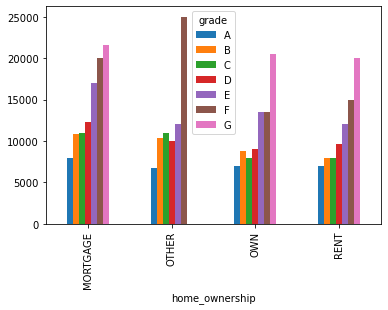

In [210]:
loan_df.pivot_table(
    index='home_ownership',
    values='loan_amnt',
    aggfunc='median',
    columns='grade'
).plot(kind='bar')

<AxesSubplot:xlabel='home_ownership'>

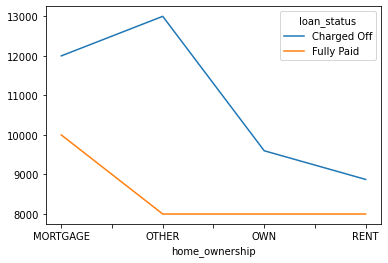

In [211]:
loan_df.pivot_table(
    index='home_ownership',
    values='loan_amnt',
    aggfunc='median',
    columns=['loan_status']
).plot()

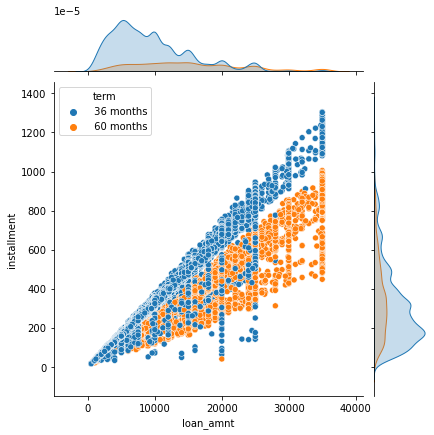

In [212]:
sns.jointplot(x='loan_amnt', y='installment', data=loan_df, hue='term')

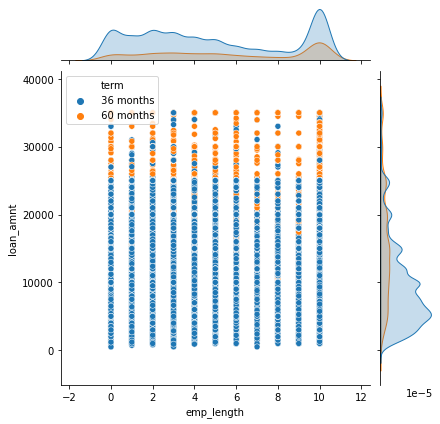

In [213]:
sns.jointplot(x='emp_length', y='loan_amnt', data=loan_df, hue='term')

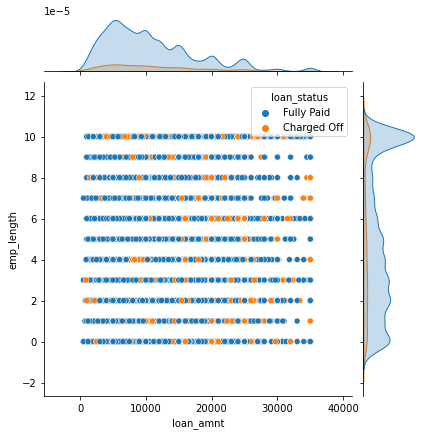

In [214]:
sns.jointplot(x='loan_amnt', y='emp_length', data=loan_df, hue='loan_status')

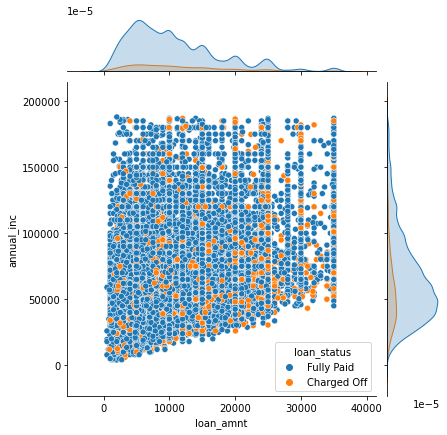

In [215]:
sns.jointplot(x='loan_amnt', y='annual_inc', hue='loan_status', data=loan_df)

In [216]:
loan_df.groupby(['loan_status'])['term'].value_counts()

loan_status  term      
Charged Off   36 months     3184
              60 months     2365
Fully Paid    36 months    25365
              60 months     6894
Name: term, dtype: int64

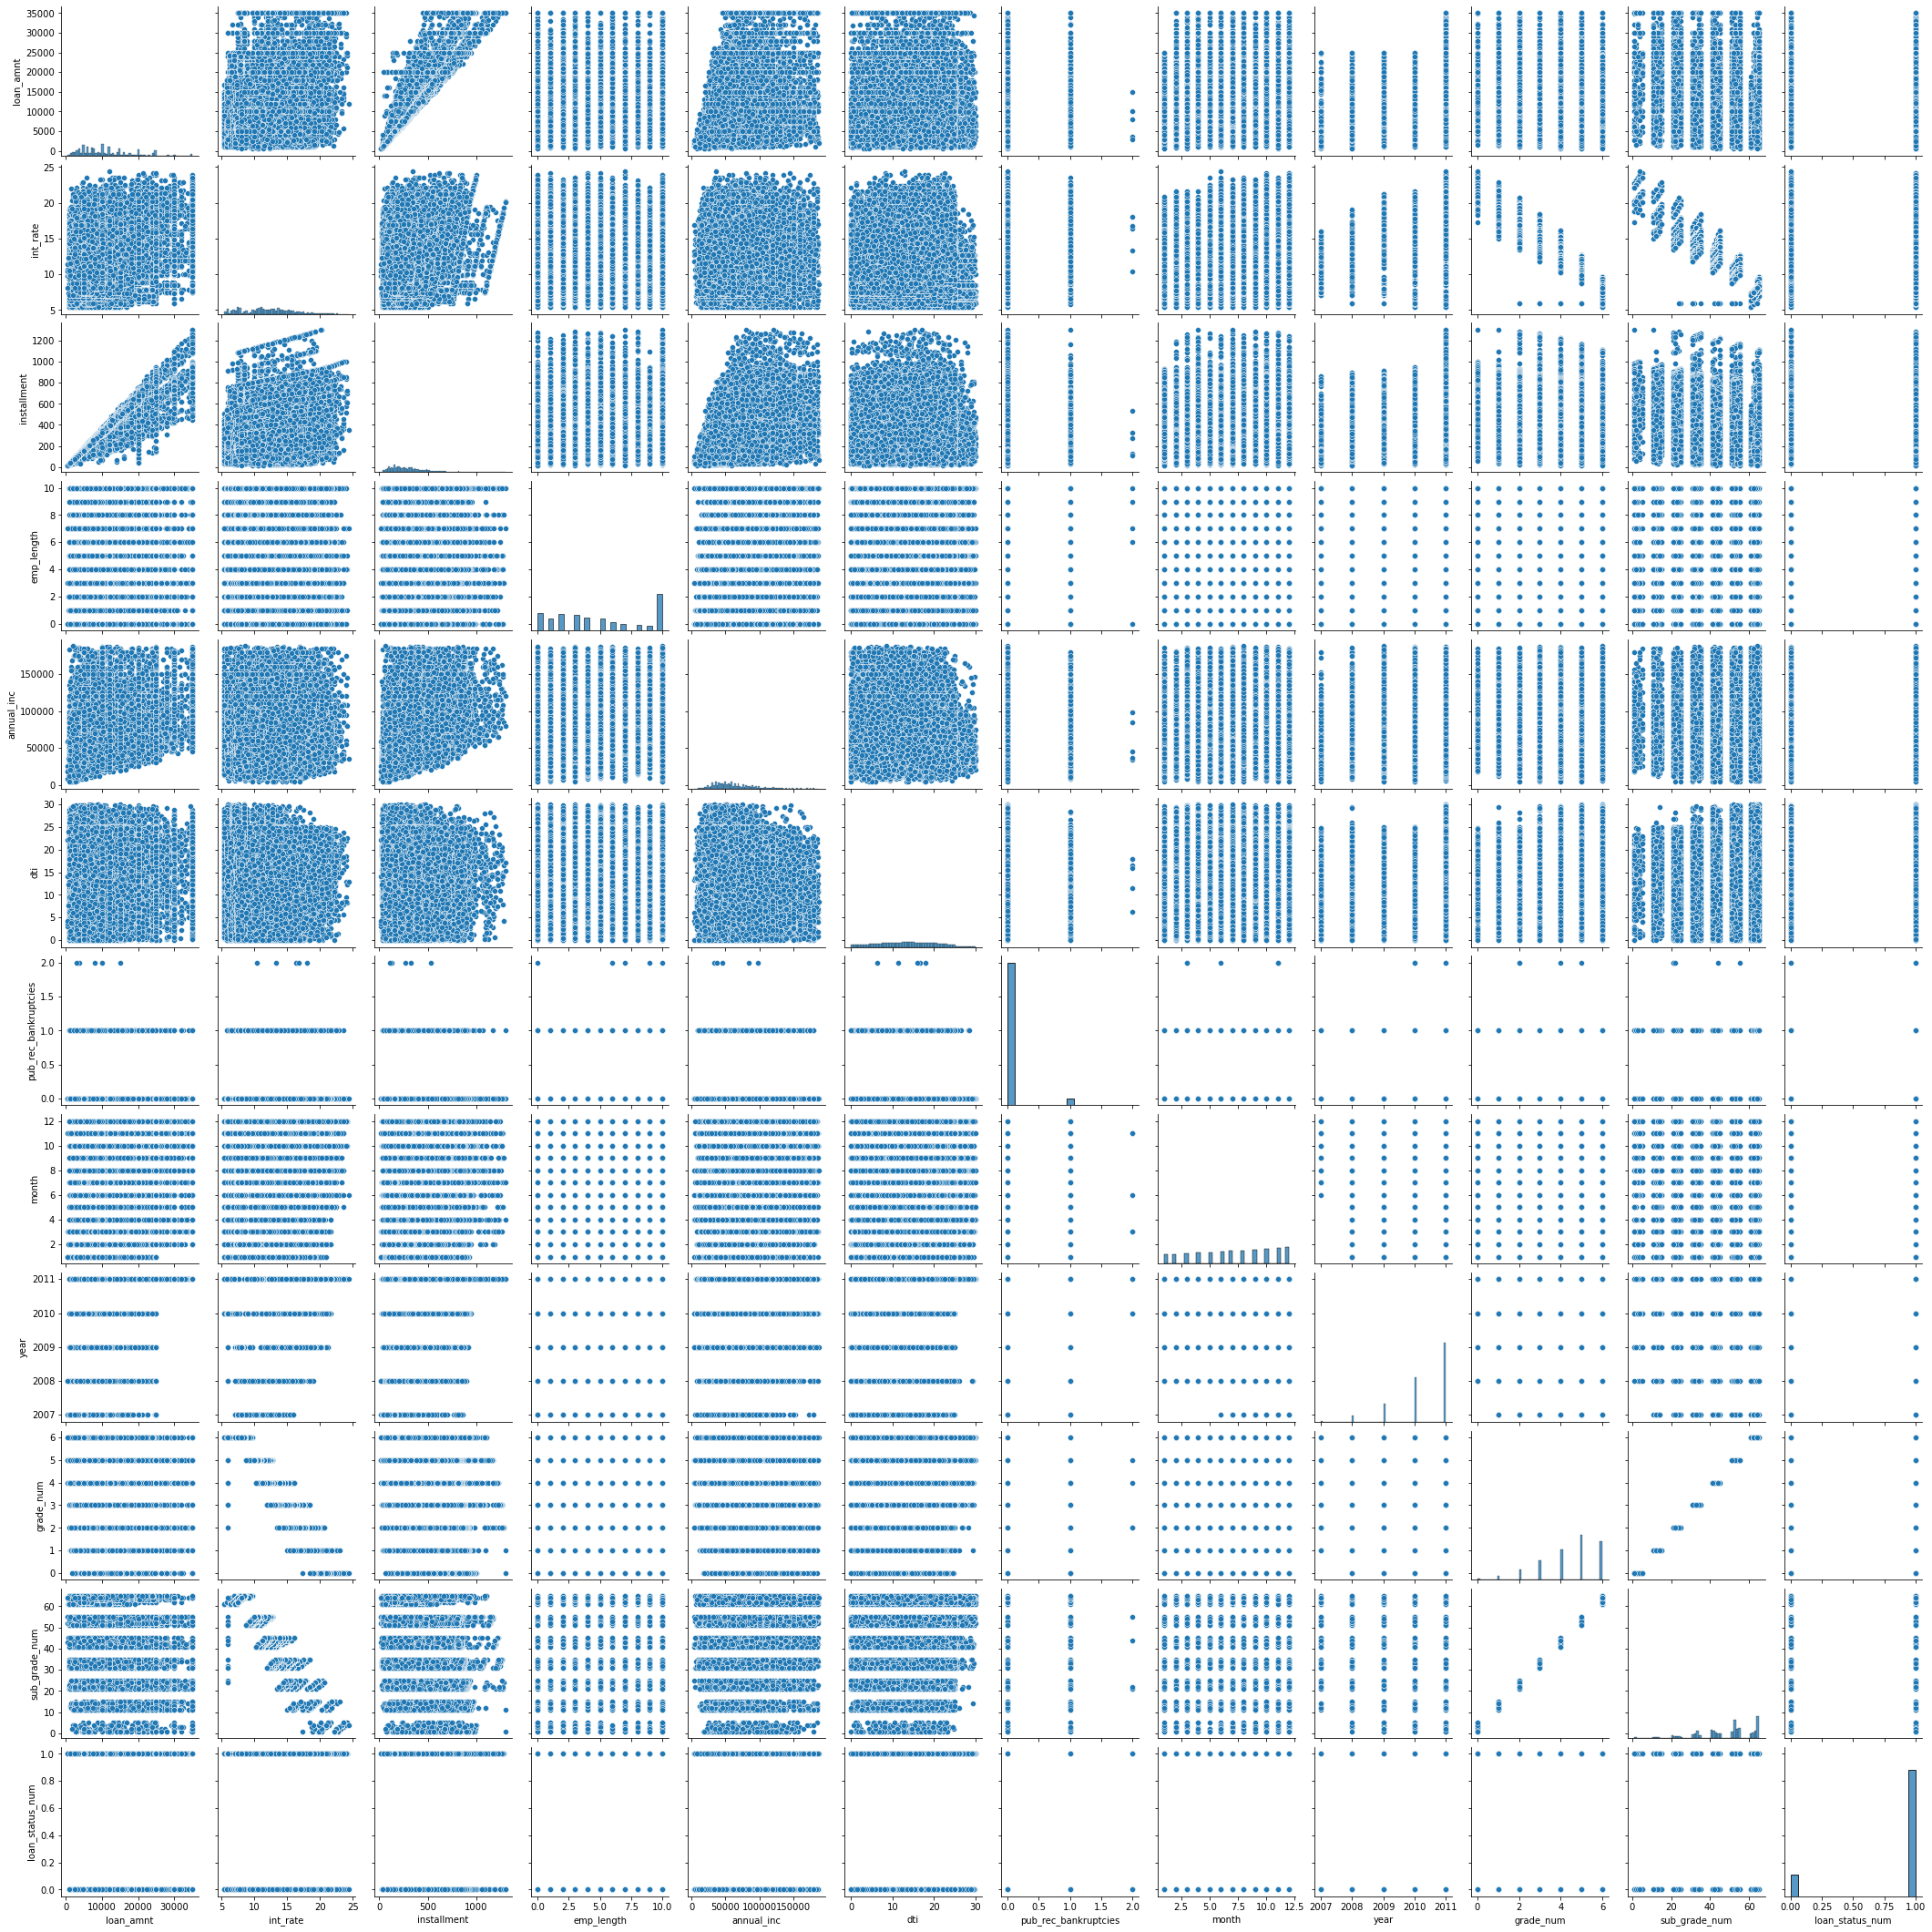

In [217]:
sns.pairplot(loan_df)
plt.savefig('pair_plot.png')
plt.show()

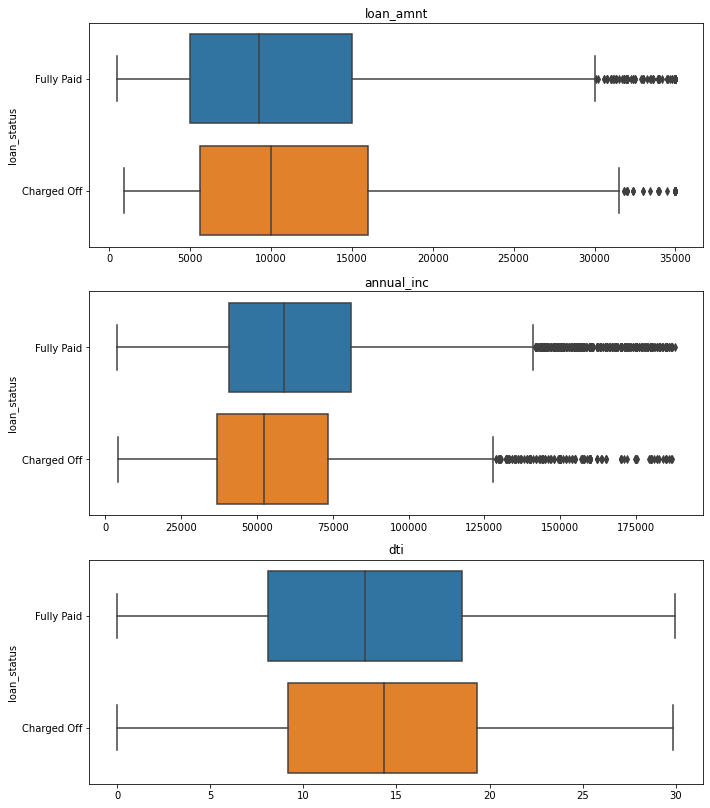

In [218]:
fig, axes = plt.subplots(3, 1, figsize=(11, 14))
for name, ax in zip(['loan_amnt', 'annual_inc', 'dti'], axes):
    sns.boxplot(data=loan_df, y='loan_status', x=name, ax=ax)
    # ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
#     if ax != axes[-1]:
#         ax.set_xlabel('')
    ax.set_xlabel('')

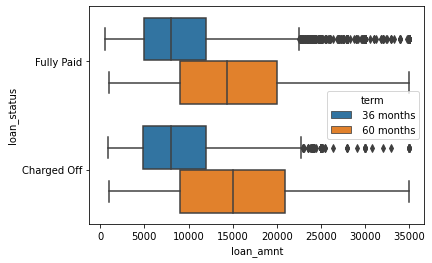

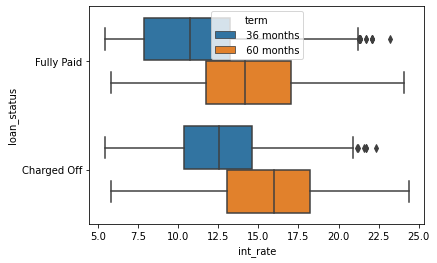

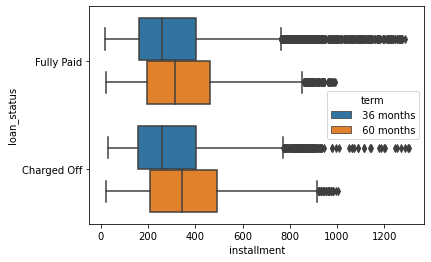

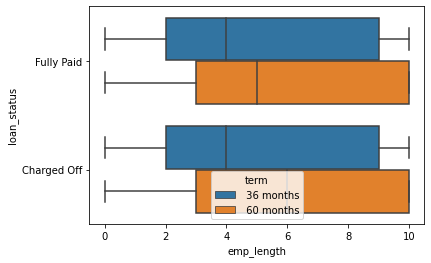

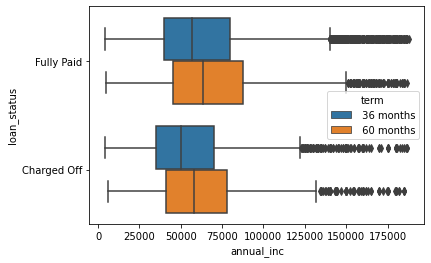

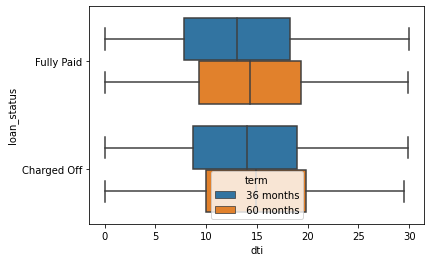

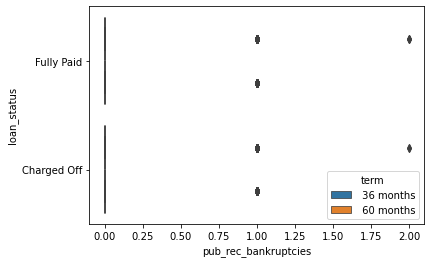

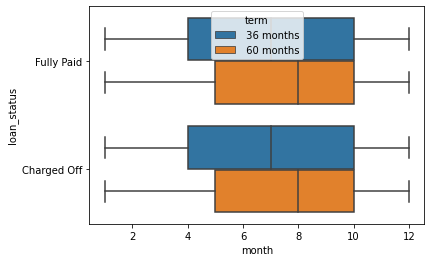

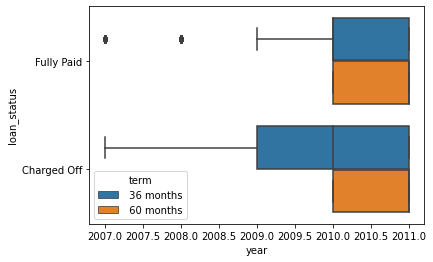

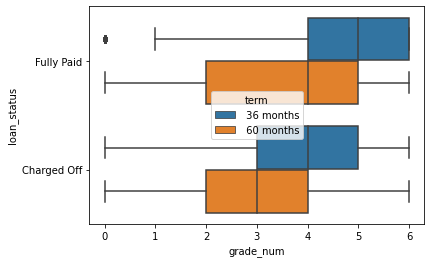

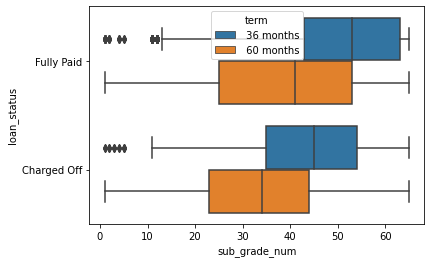

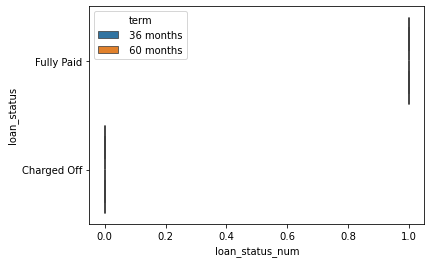

In [219]:
for name in loan_df.columns:
    try:
        sns.boxplot(data=loan_df, y='loan_status', x=name, hue='term')
        plt.show()
    except:
        pass

In [220]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'month', 'year', 'month_alpha', 'grade_num', 'sub_grade_num',
       'loan_status_num', 'loan_amount_cat', 'int_rate_cat', 'dti_cat'],
      dtype='object')

In [221]:
objects = set(loan_df.select_dtypes('object').columns.to_list())

In [222]:
all_cols = set(loan_df.columns)

In [223]:
numeric = all_cols - objects

In [224]:
numeric.remove('loan_status_num')
numeric.remove('pub_rec_bankruptcies')

In [225]:
len(numeric)

13

cannot plot for dti_cat
cannot plot for loan_amount_cat


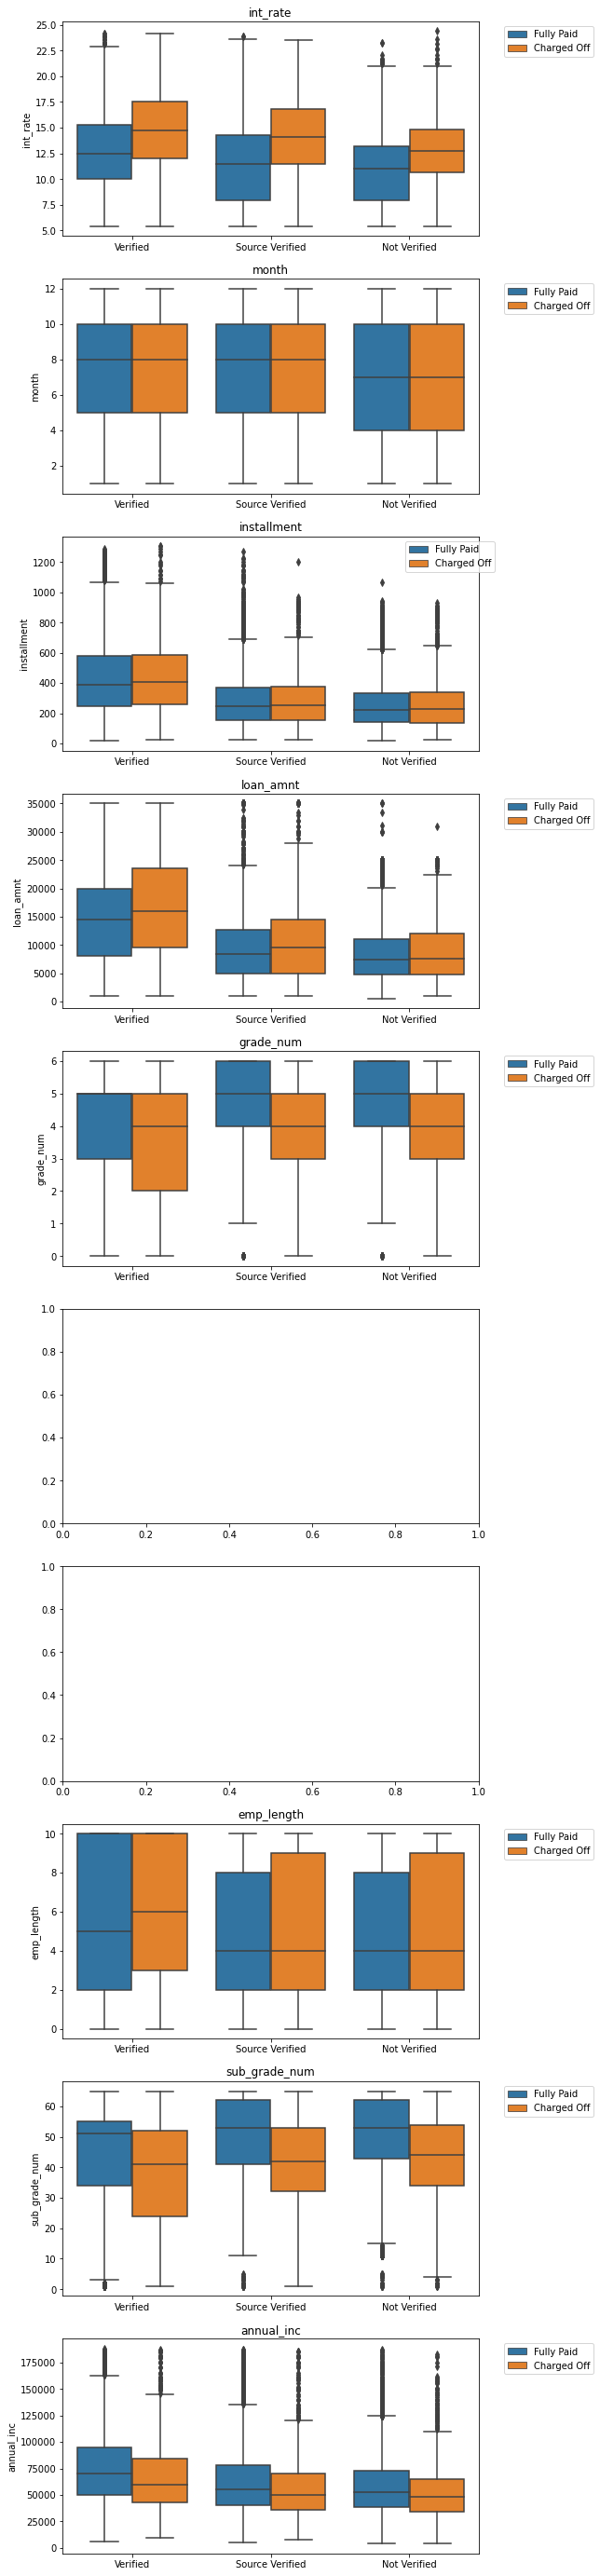

In [226]:
# fig, axes = plt.subplots(10, 1, figsize=(8, 50))
# for name, ax in zip(numeric, axes):
#     sns.boxplot(data=loan_df, x='loan_status', y=name, ax=ax, hue='verification_status')
#     ax.set_title(name)
#     ax.set_xlabel('')
#     ax.legend(bbox_to_anchor=(1.05, 1))

fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for name, ax in zip(numeric, axes):
    try:
        sns.boxplot(data=loan_df, x='verification_status', y=name, ax=ax, hue='loan_status')
        ax.set_title(name)
        ax.set_xlabel('')
        ax.legend(bbox_to_anchor=(1.05, 1))
    except:
        print(f'cannot plot for {name}')

In [227]:
objects

{'addr_state',
 'grade',
 'home_ownership',
 'loan_status',
 'month_alpha',
 'purpose',
 'sub_grade',
 'term',
 'verification_status'}

cannot plot for dti_cat
cannot plot for loan_amount_cat


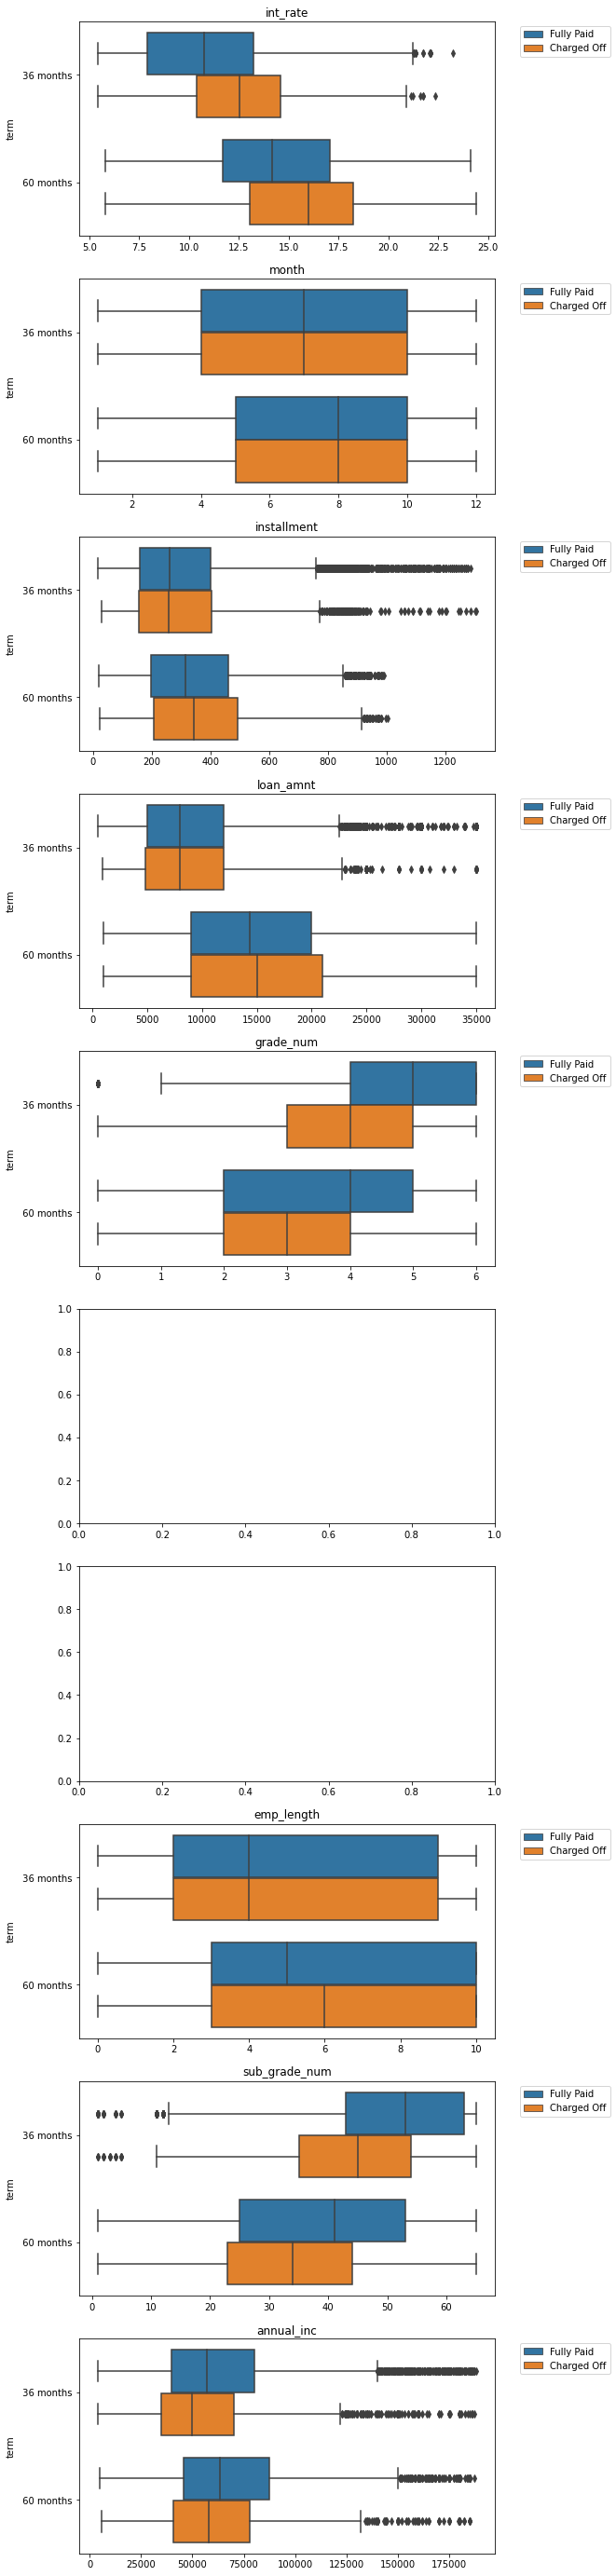

In [228]:
# fig, axes = plt.subplots(10, 1, figsize=(8, 50))
# for name, ax in zip(numeric, axes):
#     sns.boxplot(data=loan_df, y='loan_status', x=name, ax=ax, hue='term')
#     ax.set_title(name)
#     ax.set_xlabel('')
#     ax.legend(bbox_to_anchor=(1.05, 1))
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for name, ax in zip(numeric, axes):
    try:
        sns.boxplot(data=loan_df, y='term', x=name, ax=ax, hue='loan_status')
        ax.set_title(name)
        ax.set_xlabel('')
        ax.legend(bbox_to_anchor=(1.05, 1))
    except:
        print(f'cannot plot for {name}')

---

TypeError: Neither the `x` nor `y` variable appears to be numeric.

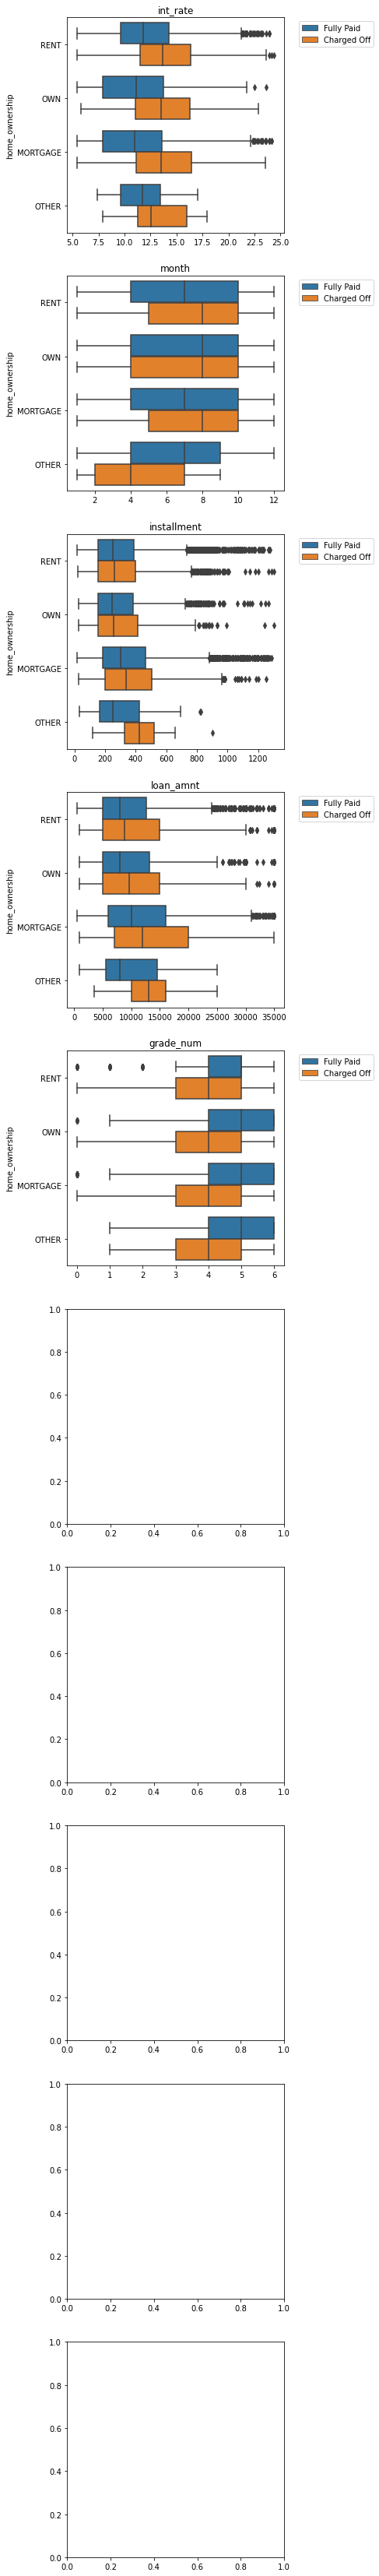

In [229]:
fig, axes = plt.subplots(10, 1, figsize=(5, 60))
for name, ax in zip(numeric, axes):
    sns.boxplot(data=loan_df, y='home_ownership', x=name, ax=ax, hue='loan_status')
    ax.set_title(name)
    ax.set_xlabel('')
    ax.legend(bbox_to_anchor=(1.05, 1))

---

In [230]:
# fig, axes = plt.subplots(10, 1, figsize=(5, 60))
# for name, ax in zip(numeric, axes):
#     sns.boxplot(data=loan_df, y='purpose', x=name, ax=ax, hue='loan_status')
#     ax.set_title(name)
#     ax.set_xlabel('')
#     ax.legend(bbox_to_anchor=(1.05, 1))


loan_df.pivot_table(
    index='purpose',
    values=numeric,
    aggfunc='median'
)

annual_inc     dti  emp_length  grade_num  installment  \
purpose                                                                      
car                    54000.0  10.650           5          5      161.470   
credit_card            60000.0  14.790           4          5      307.040   
debt_consolidation     57188.0  14.650           5          5      324.370   
educational            41000.0  11.170           2          5      170.380   
home_improvement       69996.0  10.800           6          5      256.240   
house                  60000.0  10.380           4          5      311.800   
major_purchase         54036.0  10.450           4          5      186.610   
medical                54000.0  12.470           5          5      186.060   
moving                 48500.0  11.580           3          5      155.535   
other                  51478.0  12.420           4          5      181.780   
renewable_energy       57000.0  12.250           7          5      167.770   
small_business         62000.0  10.630           4          4      323.485   
vacation               51000.0  11.715           5          5      138.665   
wedding                59000.0  12.490           3          5      246.600   

                    int_rate  loan_amnt  month  sub_grade_num  year  
purpose                                                              
car                   10.370     5900.0      7           54.0  2011  
credit_card           11.490    10000.0      8           52.0  2011  
debt_consolidation    12.230    11000.0      8           51.0  2011  
educational           11.830     5000.0      6           52.0  2009  
home_improvement      10.990     9000.0      7           53.0  2011  
house                 11.830    10000.0      7           51.0  2011  
major_purchase        10.650     6000.0      7           54.0  2010  
medical               11.260     6000.0      7           52.0  2011  
moving                11.120     5000.0      8           53.0  2011  
other                 11.490     6000.0      7           52.0  2010  
renewable_energy      10.990     6000.0      8           53.0  2011  
small_business        12.785    10750.0      7           44.0  2011  
vacation              10.650     4525.0      7           53.5  2011  
wedding               11.580     8000.0      7           52.0  2011

In [231]:
loan_df.groupby('addr_state').value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [232]:
countries_sorted_by_total_applicants = loan_df.addr_state.value_counts().index.to_list()

In [233]:
top_5_countries = loan_df[loan_df.addr_state.isin(countries_sorted_by_total_applicants[0:5])]

In [234]:
top_5_countries.shape

(17467, 24)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

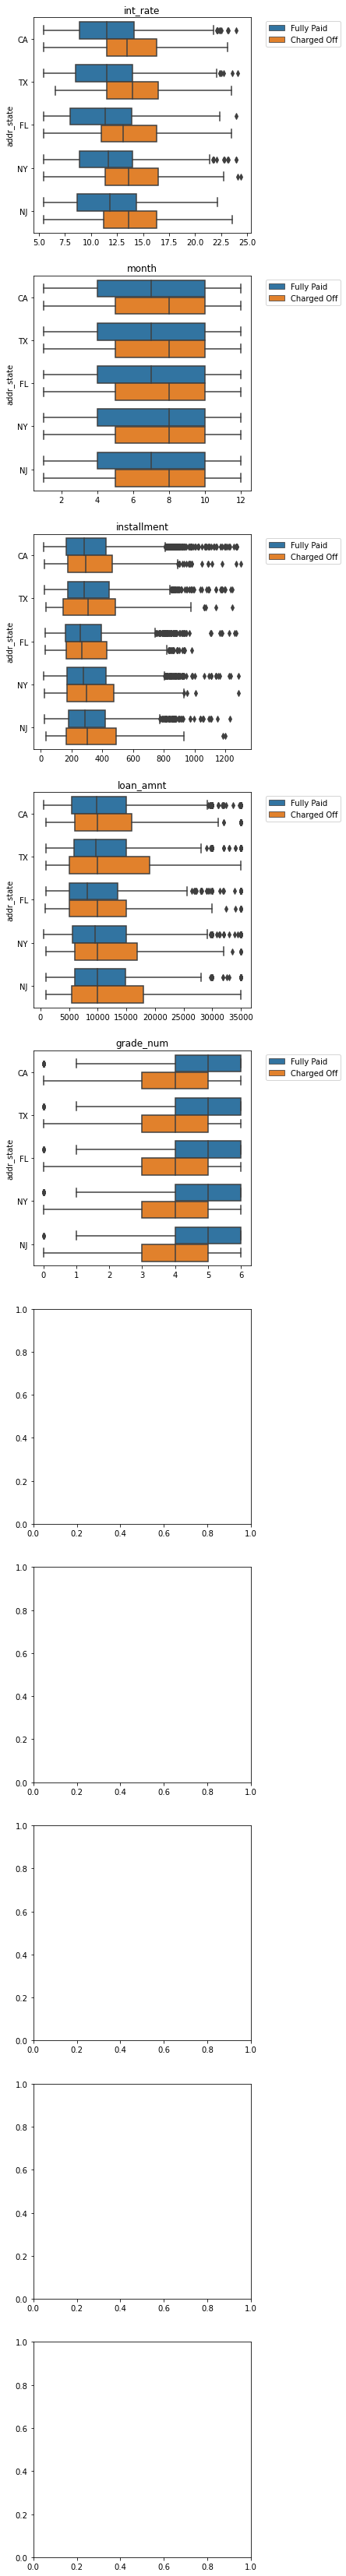

In [235]:
fig, axes = plt.subplots(10, 1, figsize=(5, 60))
for name, ax in zip(numeric, axes):
    sns.boxplot(data=top_5_countries, y='addr_state', x=name, ax=ax, hue='loan_status')
    ax.set_title(name)
    ax.set_xlabel('')
    ax.legend(bbox_to_anchor=(1.05, 1))

<AxesSubplot:xlabel='sub_grade_num', ylabel='loan_status'>

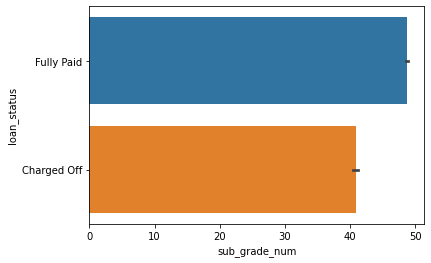

In [240]:
sns.barplot(x='sub_grade_num', y='loan_status', data=loan_df)

In [244]:
bottom_5_countries = loan_df[loan_df.addr_state.isin(countries_sorted_by_total_applicants[-5:])]

In [245]:
bottom_5_countries.addr_state.unique()

array(['IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [246]:
bottom_5_countries.shape

(28, 24)

In [237]:
# fig, axes = plt.subplots(10, 2, figsize=(20, 60))
# for name, ax in zip(numeric, axes):
#     sns.boxplot(data=loan_df, y='home_ownership', x=name, ax=ax[0], hue='loan_status')
#     sns.boxplot(data=loan_df, y='home_ownership', x=name, ax=ax[1])
#     ax[0].set_title(name)
#     ax[0].set_xlabel('')
#     ax[0].legend(bbox_to_anchor=(1.05, 1))

---

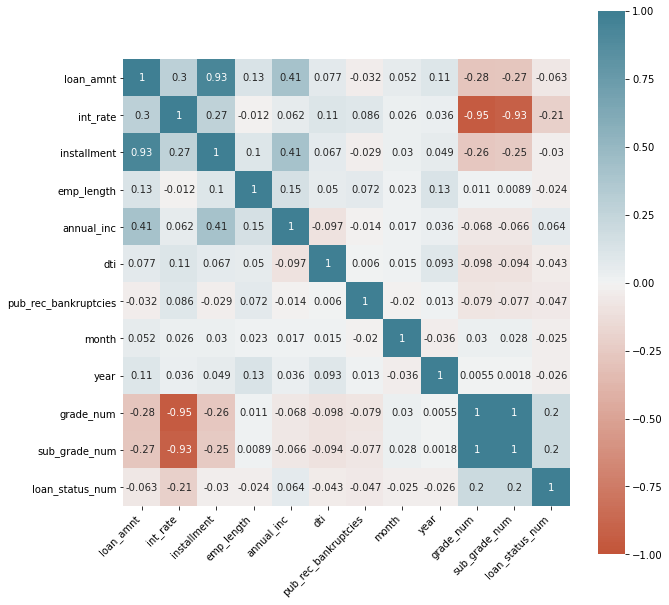

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='loan_amnt', ylabel='grade'>

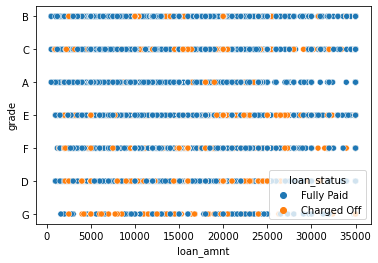

In [239]:
sns.scatterplot(x='loan_amnt', y='grade', data=loan_df, hue='loan_status')

---

In [247]:
import matplotlib.patheffects as path_effects

In [248]:
def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

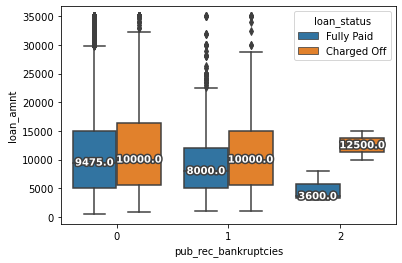

In [250]:
box_plot = sns.boxplot(data=loan_df, y='loan_amnt', x='pub_rec_bankruptcies', hue='loan_status')
add_median_labels(box_plot.axes)

---

# References
- https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
- https://www.w3schools.com/python/python_datetime.asp
- https://www.codegrepper.com/code-examples/python/extract+month+from+datetime+pandas
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/
- https://www.open.edu/openlearn/ocw/mod/oucontent/view.php?printable=1&id=4089
- https://pbpython.com/pandas-qcut-cut.html